In [138]:
import prepare_train

In [139]:
import train

In [140]:
import torch
import torch.nn as nn

In [141]:
from collections import Counter

In [168]:
num_embs = 12
input_dim = 3
hidden_dim = 4
mu_dim = 5
sigma_dim = 1

SEED = 123
torch.manual_seed(SEED)

embeddings = nn.Embedding(num_embs + 1, input_dim, padding_idx = 0)

lex_pred_ix = torch.LongTensor([[1,2, 0, 0], [3, 2, 4, 5]]).unsqueeze(dim = 1)
curr_pred_ix = torch.LongTensor([[2, 0], [4, 3]]).unsqueeze(dim = 2)

lex_pred_ix = torch.LongTensor([[1,2]]).unsqueeze(dim = 1)
curr_pred_ix = torch.LongTensor([[2]]).unsqueeze(dim = 2)

lex_pred_ix = torch.LongTensor([[3, 2, 4, 5]]).unsqueeze(dim = 1)
curr_pred_ix = torch.LongTensor([[4, 3]]).unsqueeze(dim = 2)

lex_embeds = embeddings(lex_pred_ix)
curr_embeds = embeddings(curr_pred_ix)
print (curr_embeds.size())
print (curr_embeds)
print (lex_embeds.size())
print (lex_embeds)
print ()
print ()

curr_embeds_exp = curr_embeds.expand(
    curr_embeds.size(dim=0),
    curr_embeds.size(dim=1),
    lex_embeds.size(dim=2),
    input_dim)

print (curr_embeds_exp.size())
print (curr_embeds_exp)


lex_embeds_exp = lex_embeds.expand(
    lex_embeds.size(dim=0),
    curr_embeds.size(dim=1),
    lex_embeds.size(dim=2),
    input_dim)

print (lex_embeds_exp.size())
print (lex_embeds_exp)

# paired = torch.column_stack((lex_embeds_exp, curr_embeds_exp))
paired = torch.cat((lex_embeds_exp, curr_embeds_exp), dim=3)

print (paired)

fc_pair = nn.Linear(input_dim * 2, hidden_dim)
z = fc_pair(paired)

print (z)

a = nn.ReLU()(z)

print (a)

sum_a = torch.sum(a, dim = 2)

print (sum_a)

fc_mu = nn.Linear(hidden_dim, mu_dim)
fc_sigma = nn.Linear(hidden_dim, sigma_dim)

mu = fc_mu(sum_a)
log_sigma2 = fc_sigma(sum_a)

print (mu)
print (log_sigma2)

torch.Size([2, 2, 1, 3])
tensor([[[[-0.2196, -0.3792,  0.7671]],

         [[ 0.0000,  0.0000,  0.0000]]],


        [[[ 0.1794,  1.8951,  0.4954]],

         [[-1.1925,  0.6984, -1.4097]]]], grad_fn=<EmbeddingBackward0>)
torch.Size([2, 1, 4, 3])
tensor([[[[-0.5880,  0.3486,  0.6603],
          [-0.2196, -0.3792,  0.7671],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]]],


        [[[-1.1925,  0.6984, -1.4097],
          [-0.2196, -0.3792,  0.7671],
          [ 0.1794,  1.8951,  0.4954],
          [ 0.2692, -0.0770, -1.0205]]]], grad_fn=<EmbeddingBackward0>)


torch.Size([2, 2, 4, 3])
tensor([[[[-0.2196, -0.3792,  0.7671],
          [-0.2196, -0.3792,  0.7671],
          [-0.2196, -0.3792,  0.7671],
          [-0.2196, -0.3792,  0.7671]],

         [[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]]],


        [[[ 0.1794,  1.8951,  0.4954],
          [ 0.1794, 

tensor([[[-0.7865,  0.6874,  0.7453,  0.8555,  0.3339],
         [-0.7456,  0.6555,  0.7115,  0.8218,  0.2891]],

        [[-0.6189,  0.2605,  0.3419,  0.6405,  0.2782],
         [-0.8609,  0.5051,  0.4037,  1.0563,  0.8301]]],
       grad_fn=<AddBackward0>)
tensor([[[0.6602],
         [0.7256]],

        [[0.6288],
         [0.4841]]], grad_fn=<AddBackward0>)

In [143]:
from IPython.display import Image, display

In [144]:
torch.cuda.max_memory_allocated()

0

In [ ]:
!python prepare_train.py -c config.json -s no

  0%|                                                 | 0/24499 [00:00<?, ?it/s]
0it [00:00, ?it/s]
multiprocessing.pool.RemoteTraceback: 
"""
Traceback (most recent call last):
  File "/projdata4/joint-project-folder/chlo/miniconda3/envs/TCSfromDMRS/lib/python3.9/multiprocessing/pool.py", line 125, in worker
    result = (True, func(*args, **kwds))
  File "/misc/projdata4/joint-project-folder/chlo/TCSfromDMRS/prepare_train.py", line 104, in _prepare_train_worker
    transformed = trsfm(instance)
  File "/misc/projdata4/joint-project-folder/chlo/TCSfromDMRS/transform/tcs_transform.py", line 261, in __call__
    self._get_lexical_pred()
  File "/misc/projdata4/joint-project-folder/chlo/TCSfromDMRS/transform/tcs_transform.py", line 45, in _get_lexical_pred
    if self._is_lexical_pred(node_prop['predicate'], node_prop['pos']):
  File "/misc/projdata4/joint-project-folder/chlo/TCSfromDMRS/transform/tcs_transform.py", line 69, in _is_lexical_pred
    return node_prop['pos'] in self.config[

In [161]:
!python train.py -c config.json

Initializing decoders ...
Initializing encoder ...
0it [00:00, ?it/s]
Sending encoder to device ...
GPU:0
process      16487 uses      460.375 MB GPU memory
|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    1703 KB |    1703 KB |    1703 KB |       0 B  |
|       from large pool |    1653 KB |    1653 KB |    1653 KB |       0 B  |
|       from small pool |      50 KB |      50 KB |      50 KB |       0 B  |
|--------------------------------------------------------------

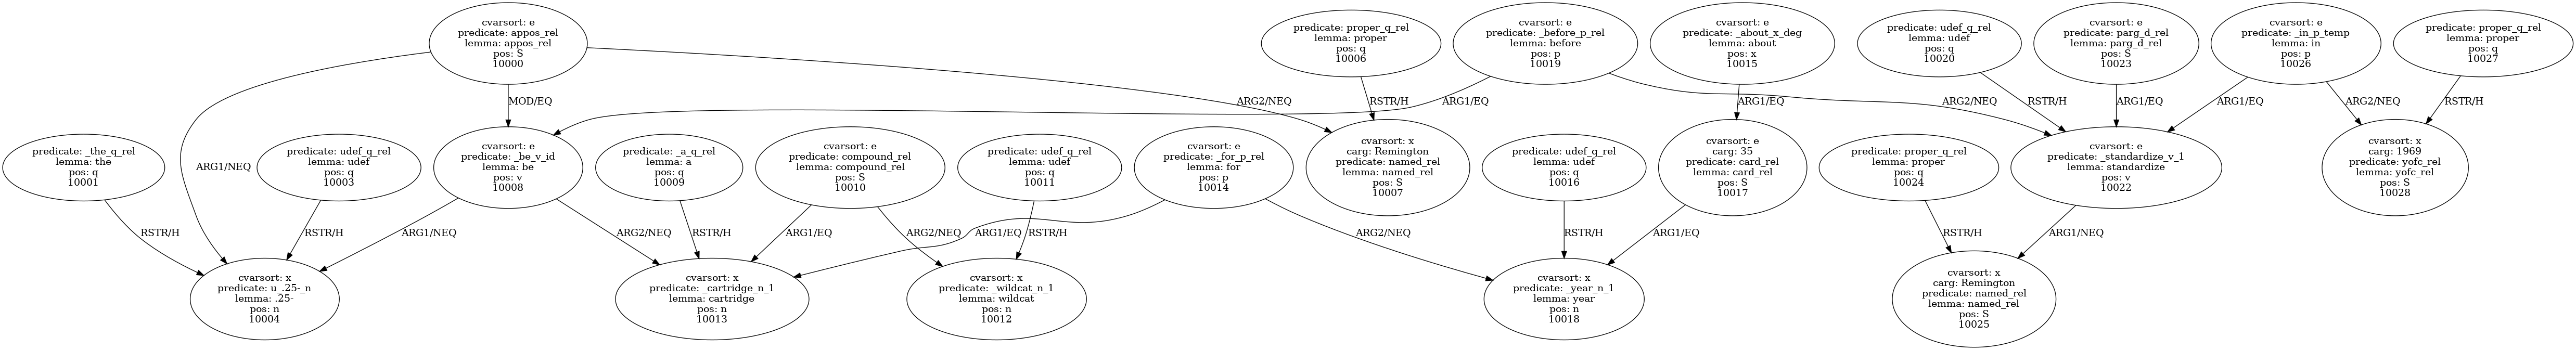

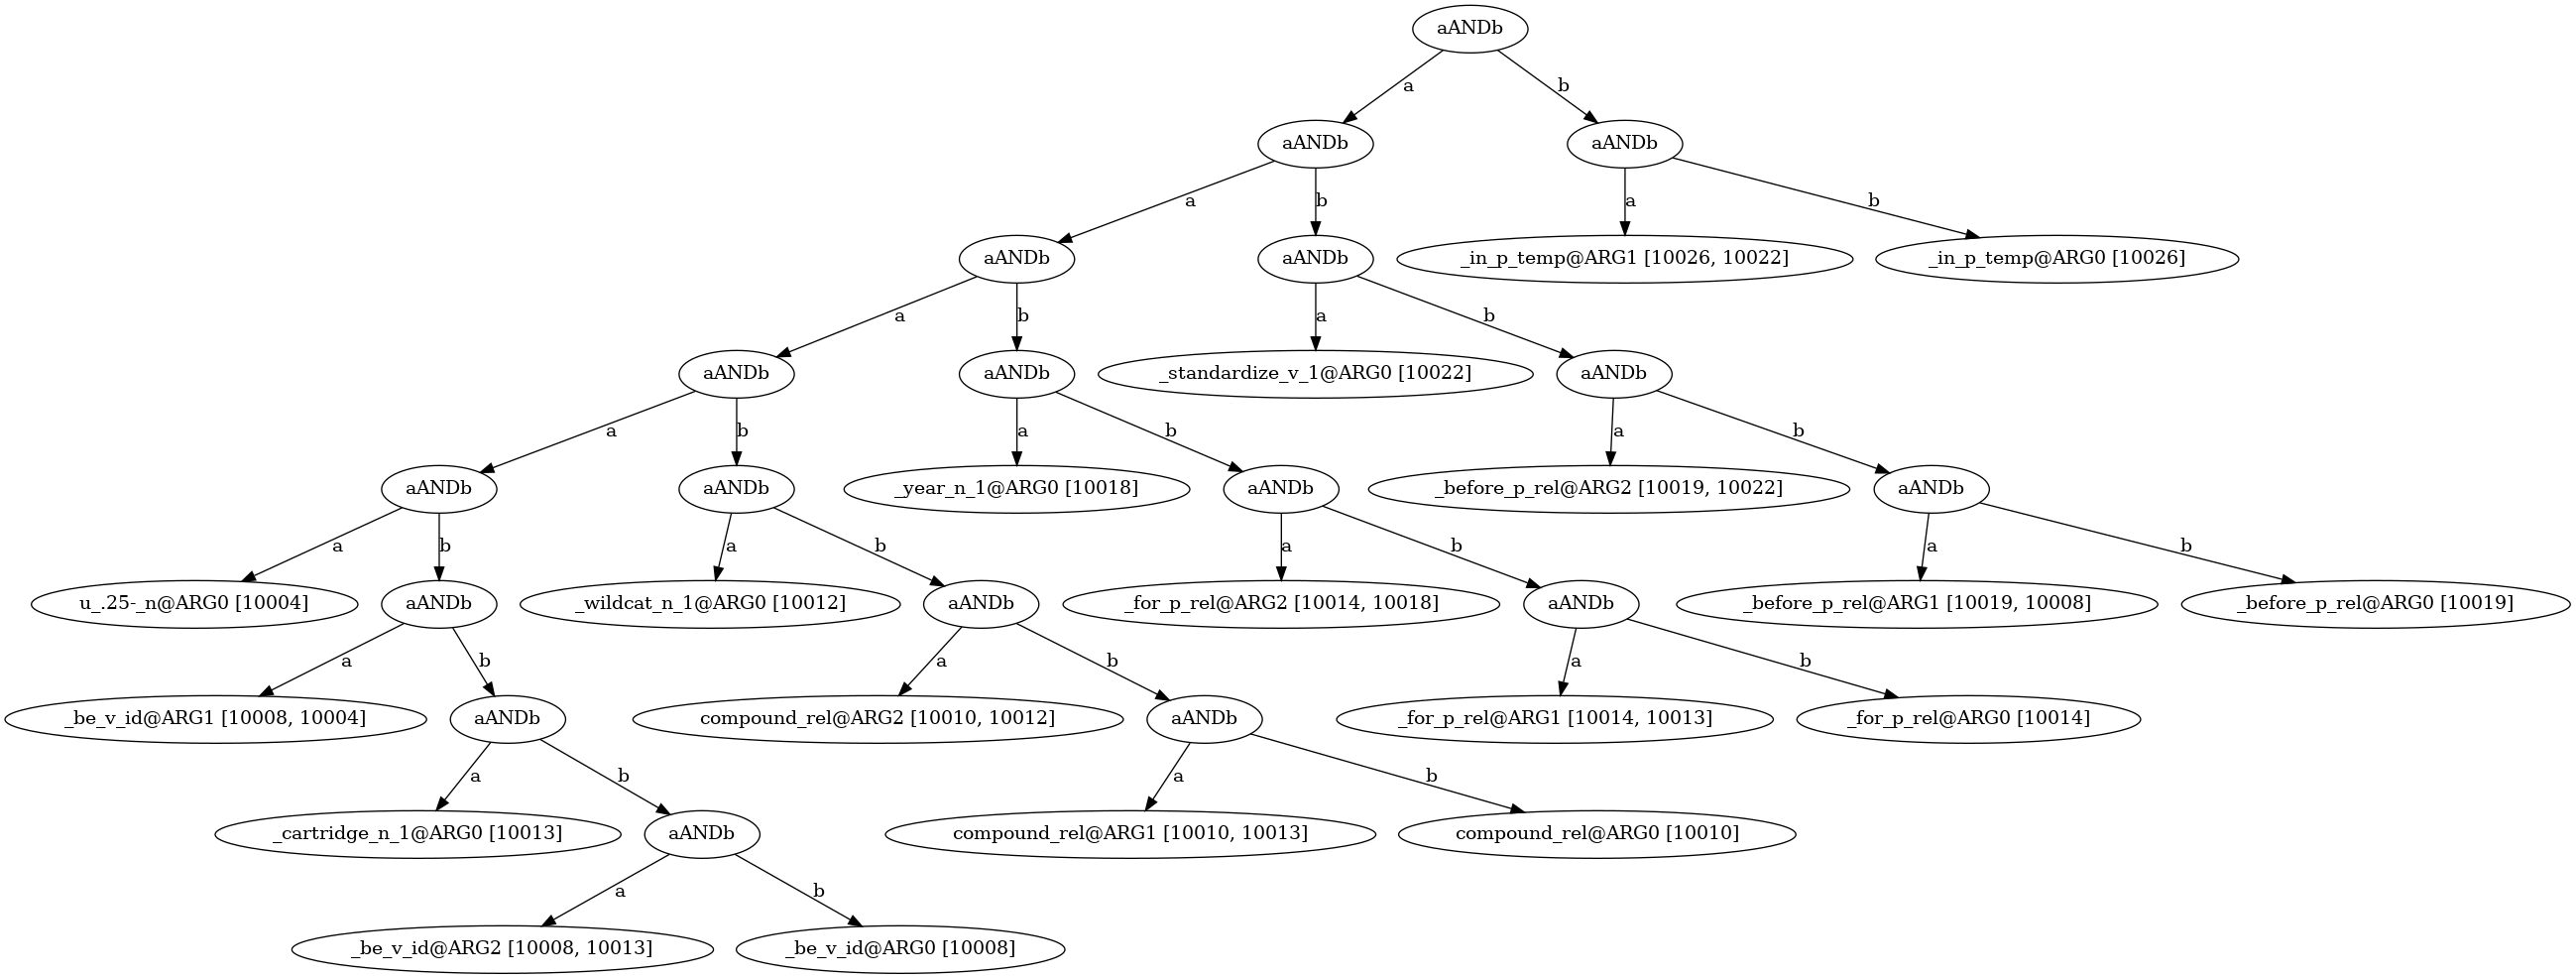

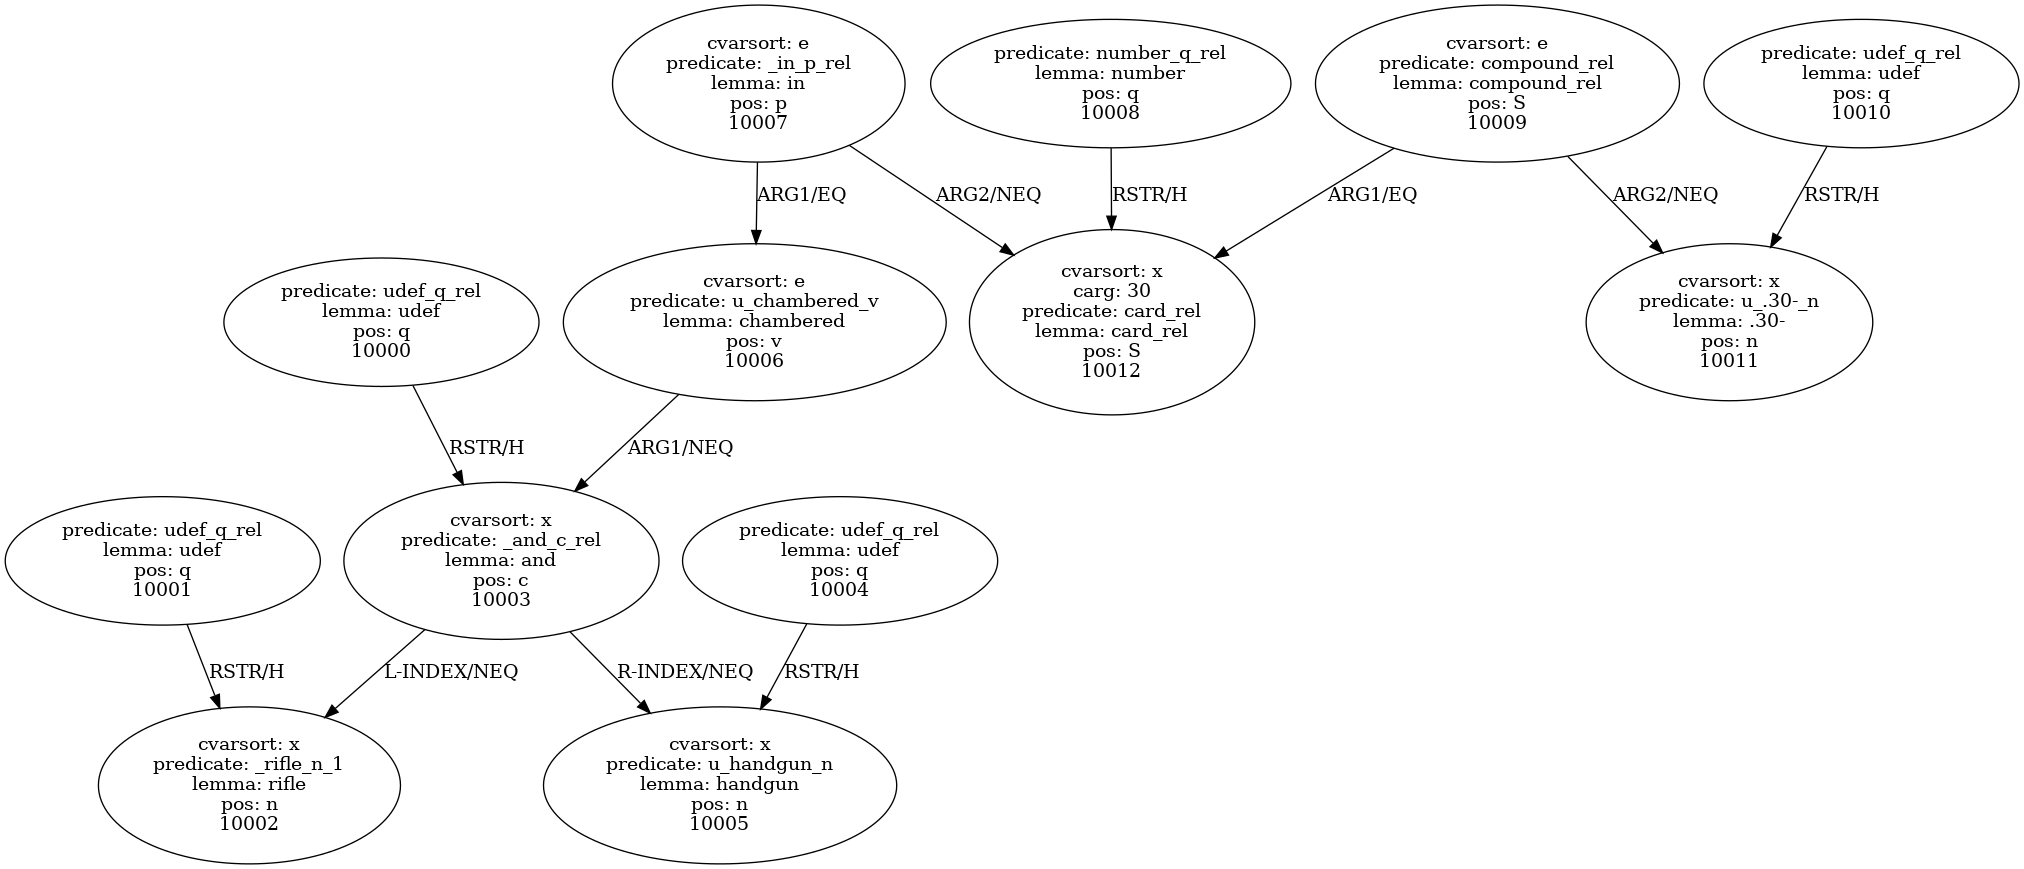

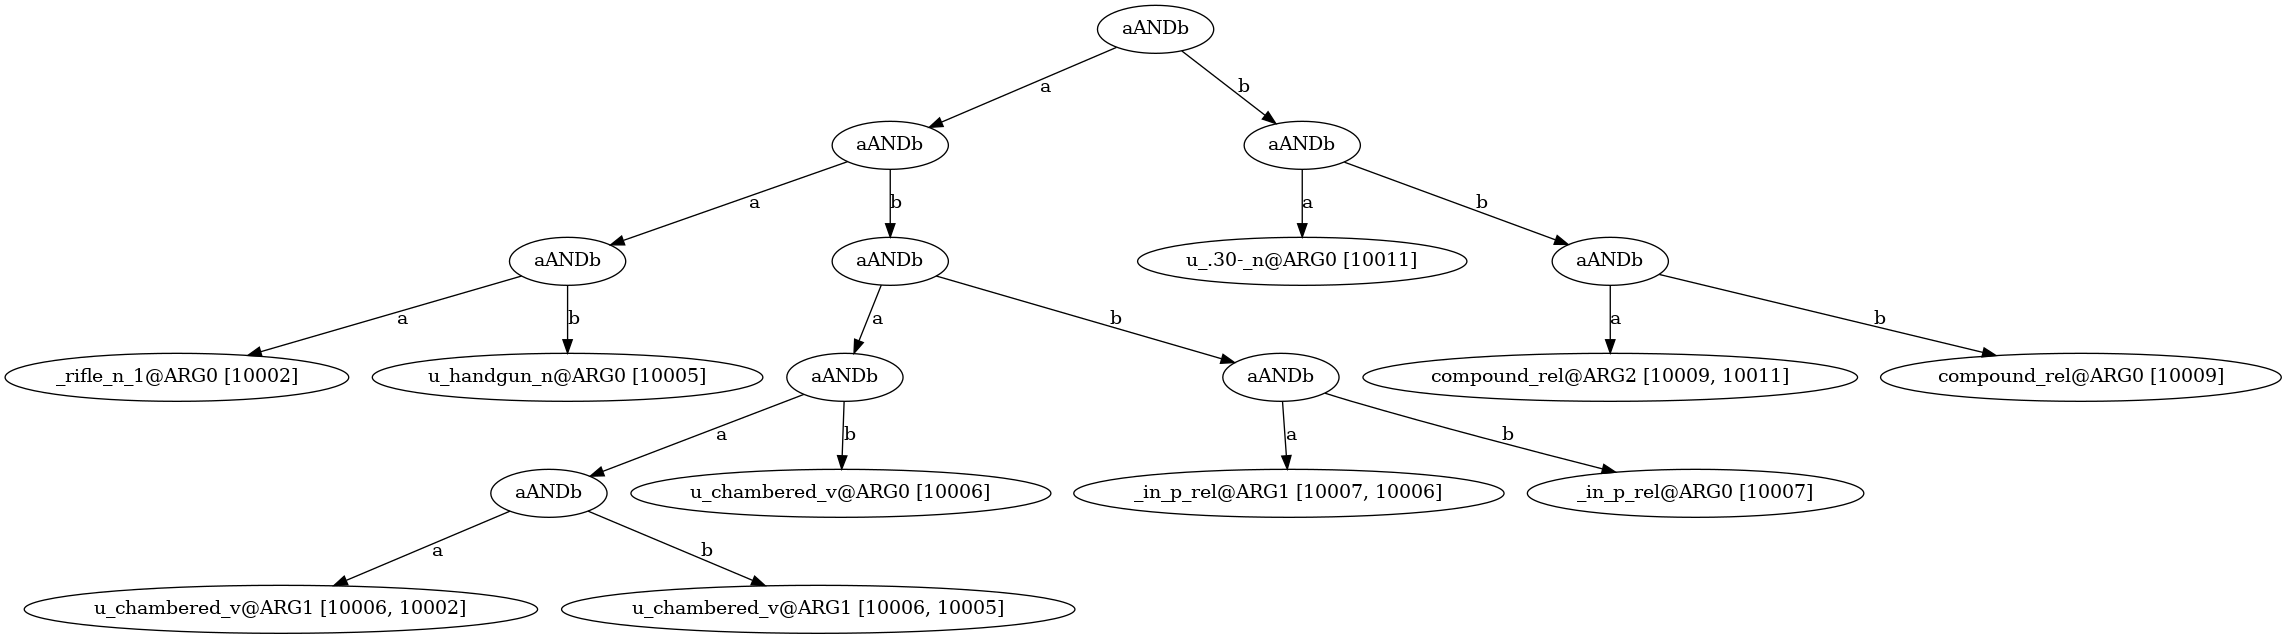

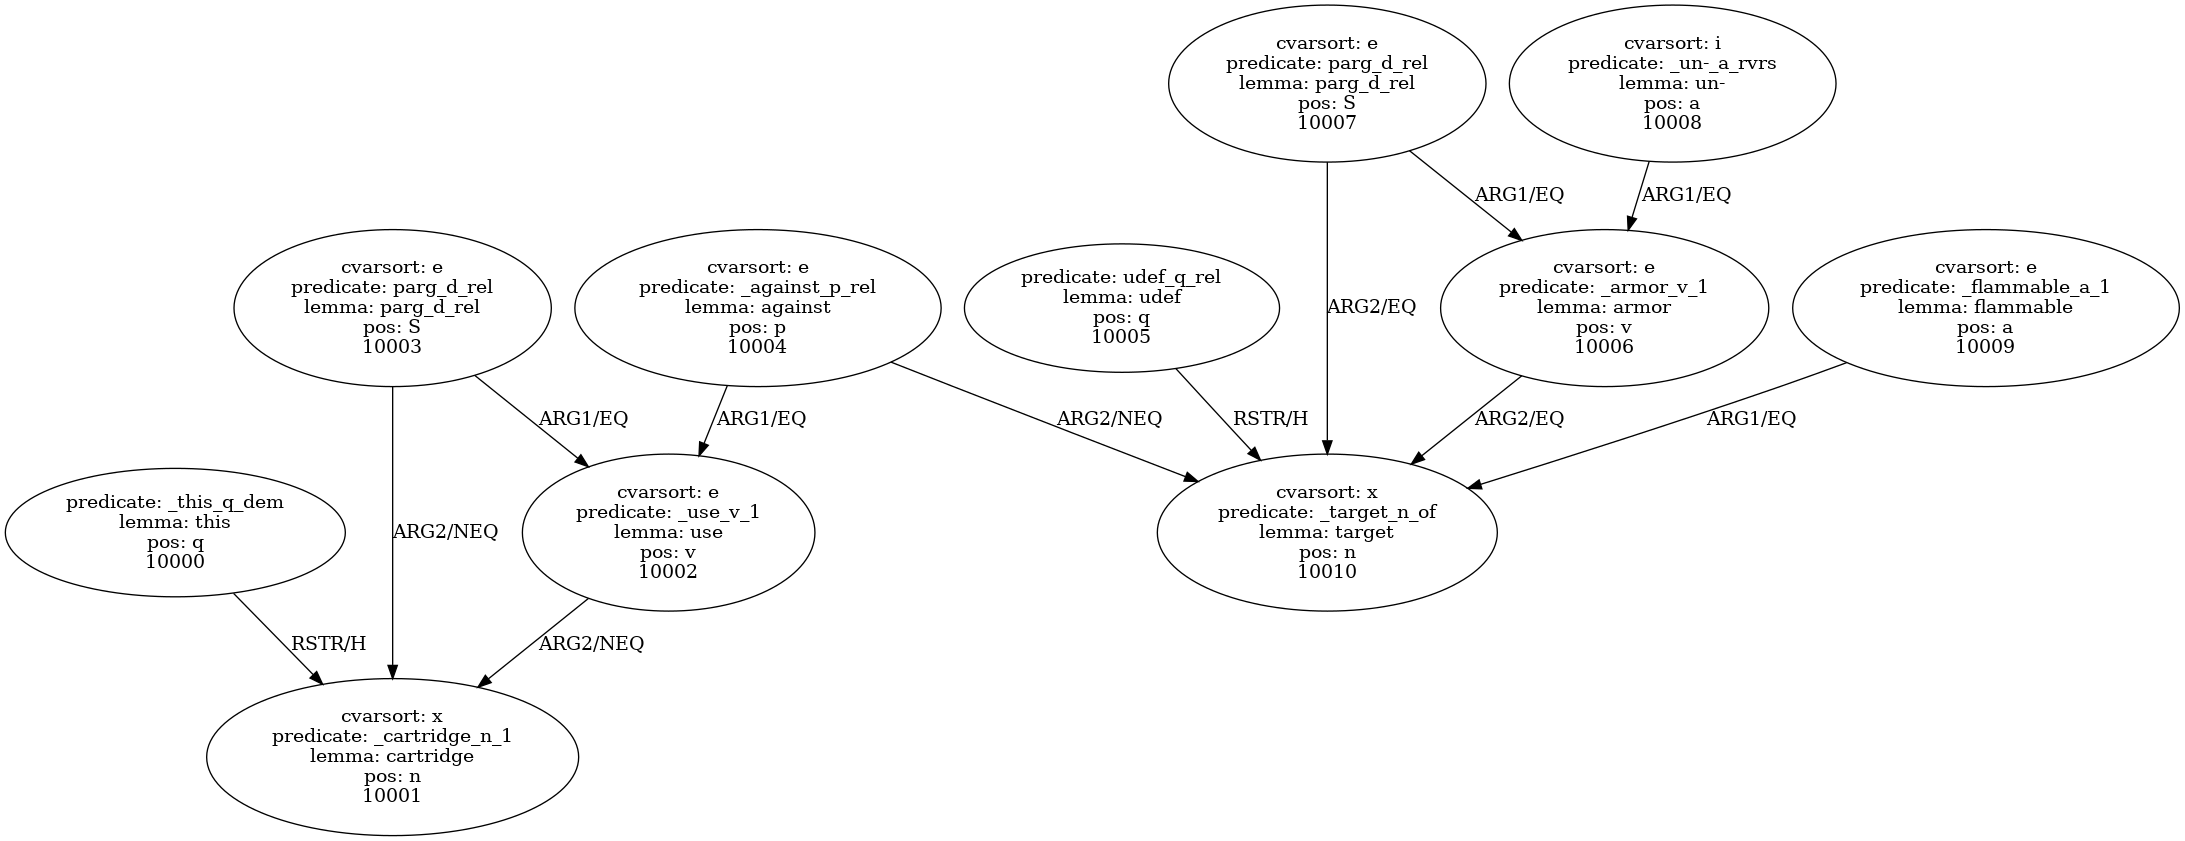

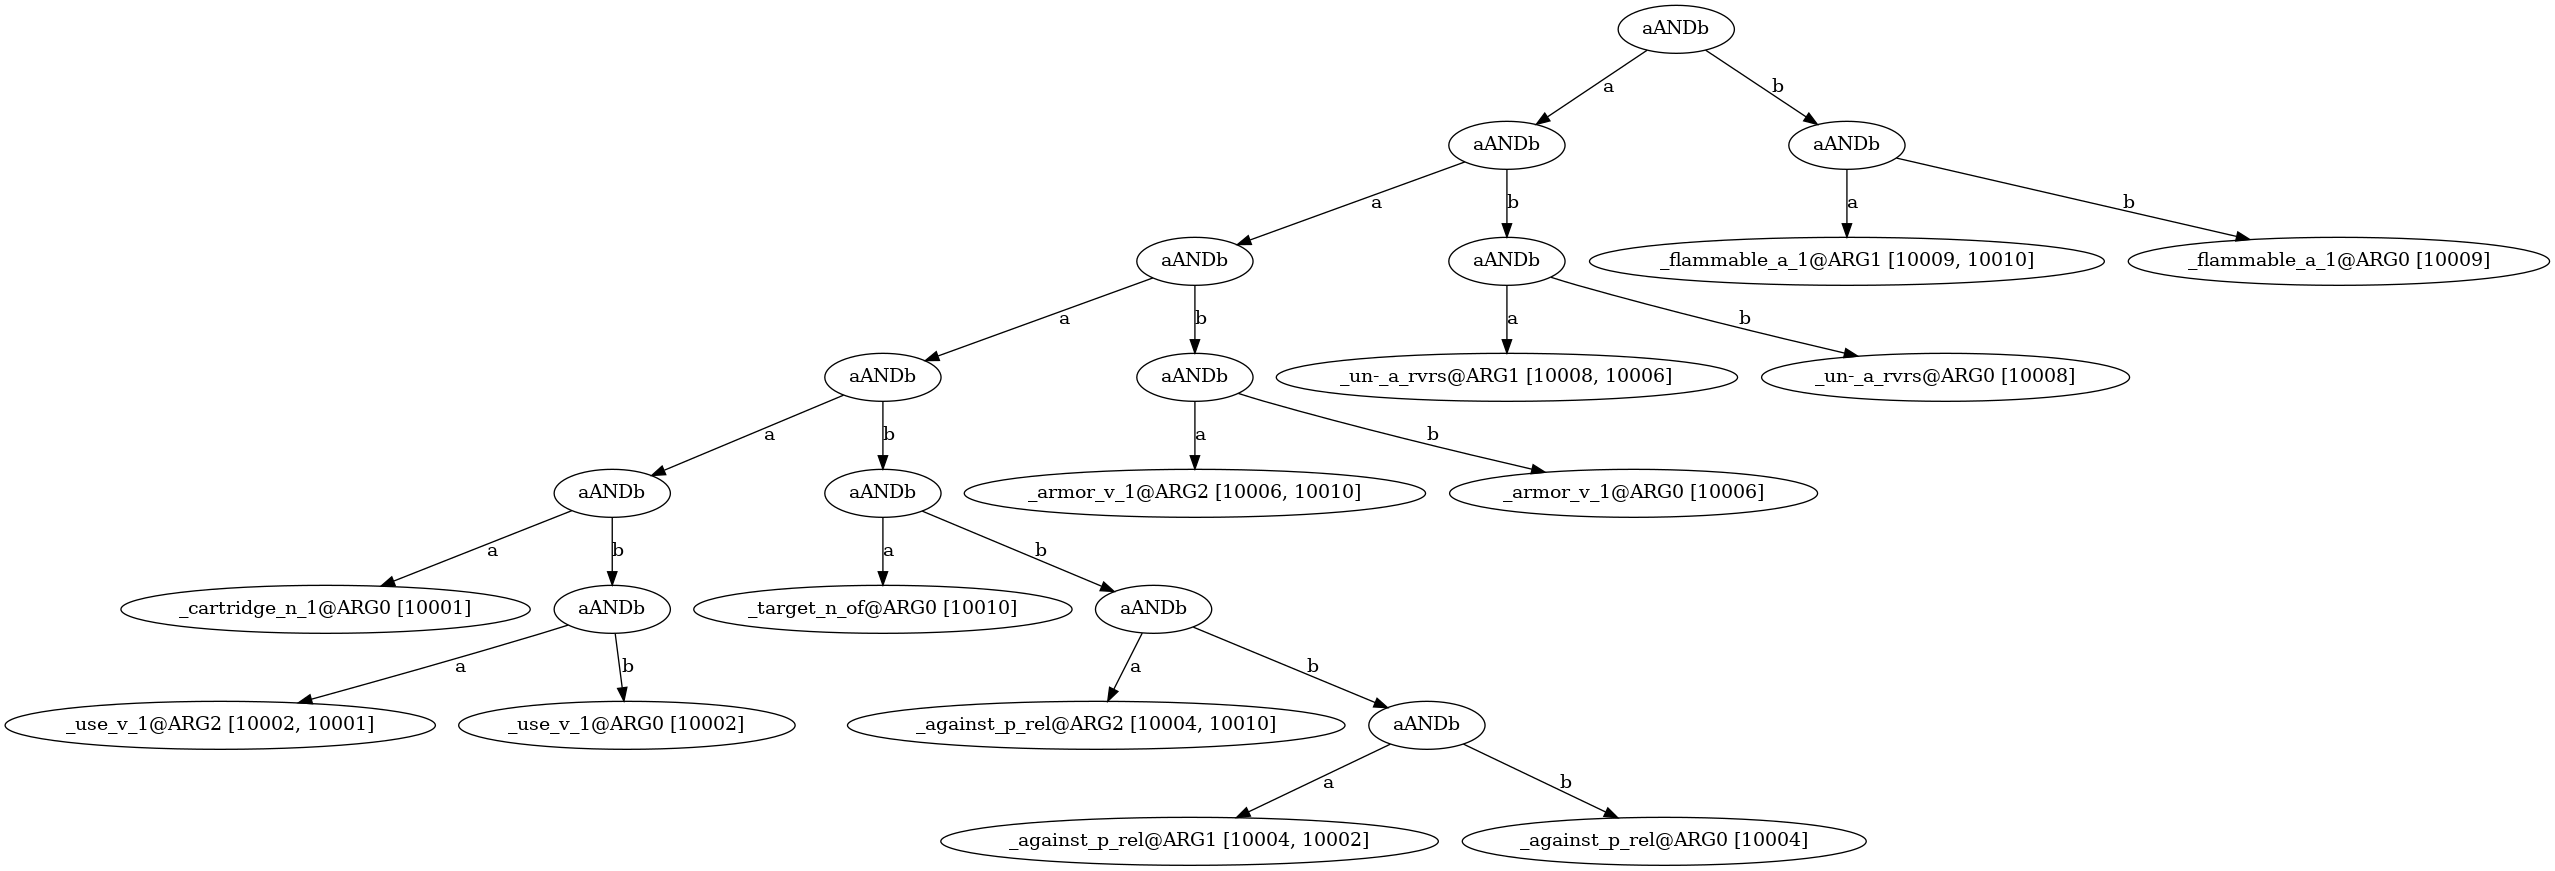

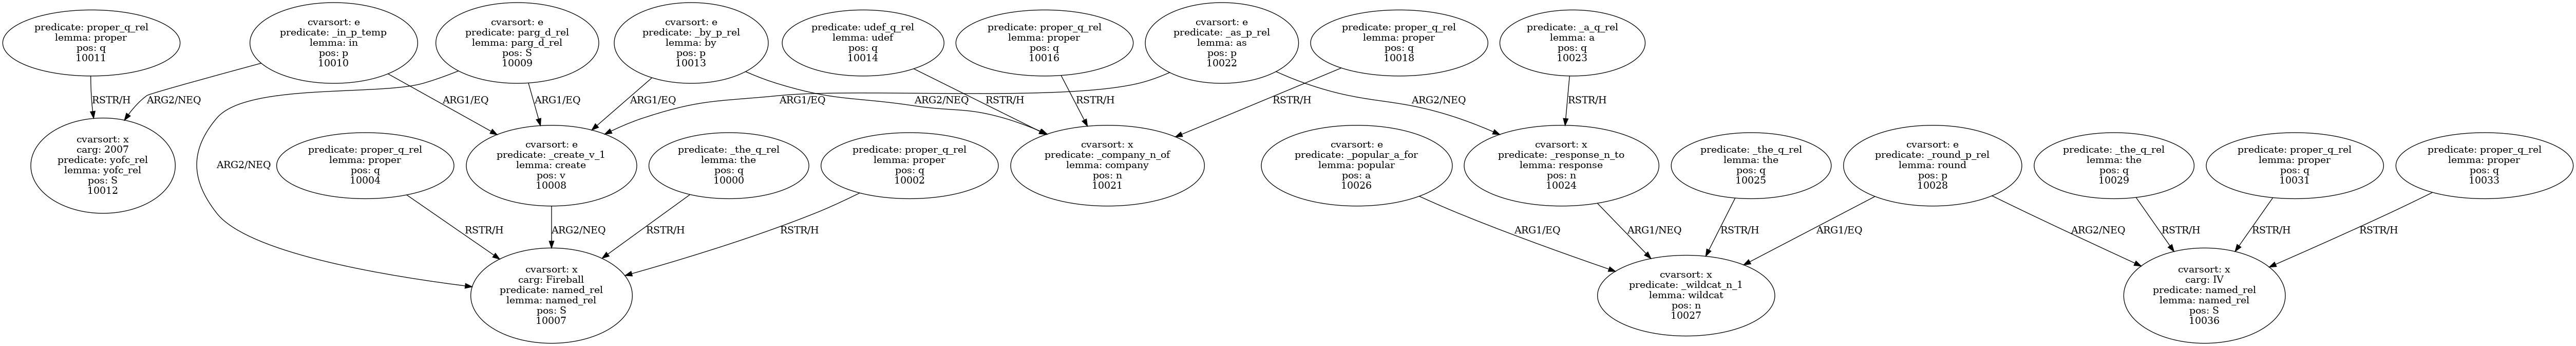

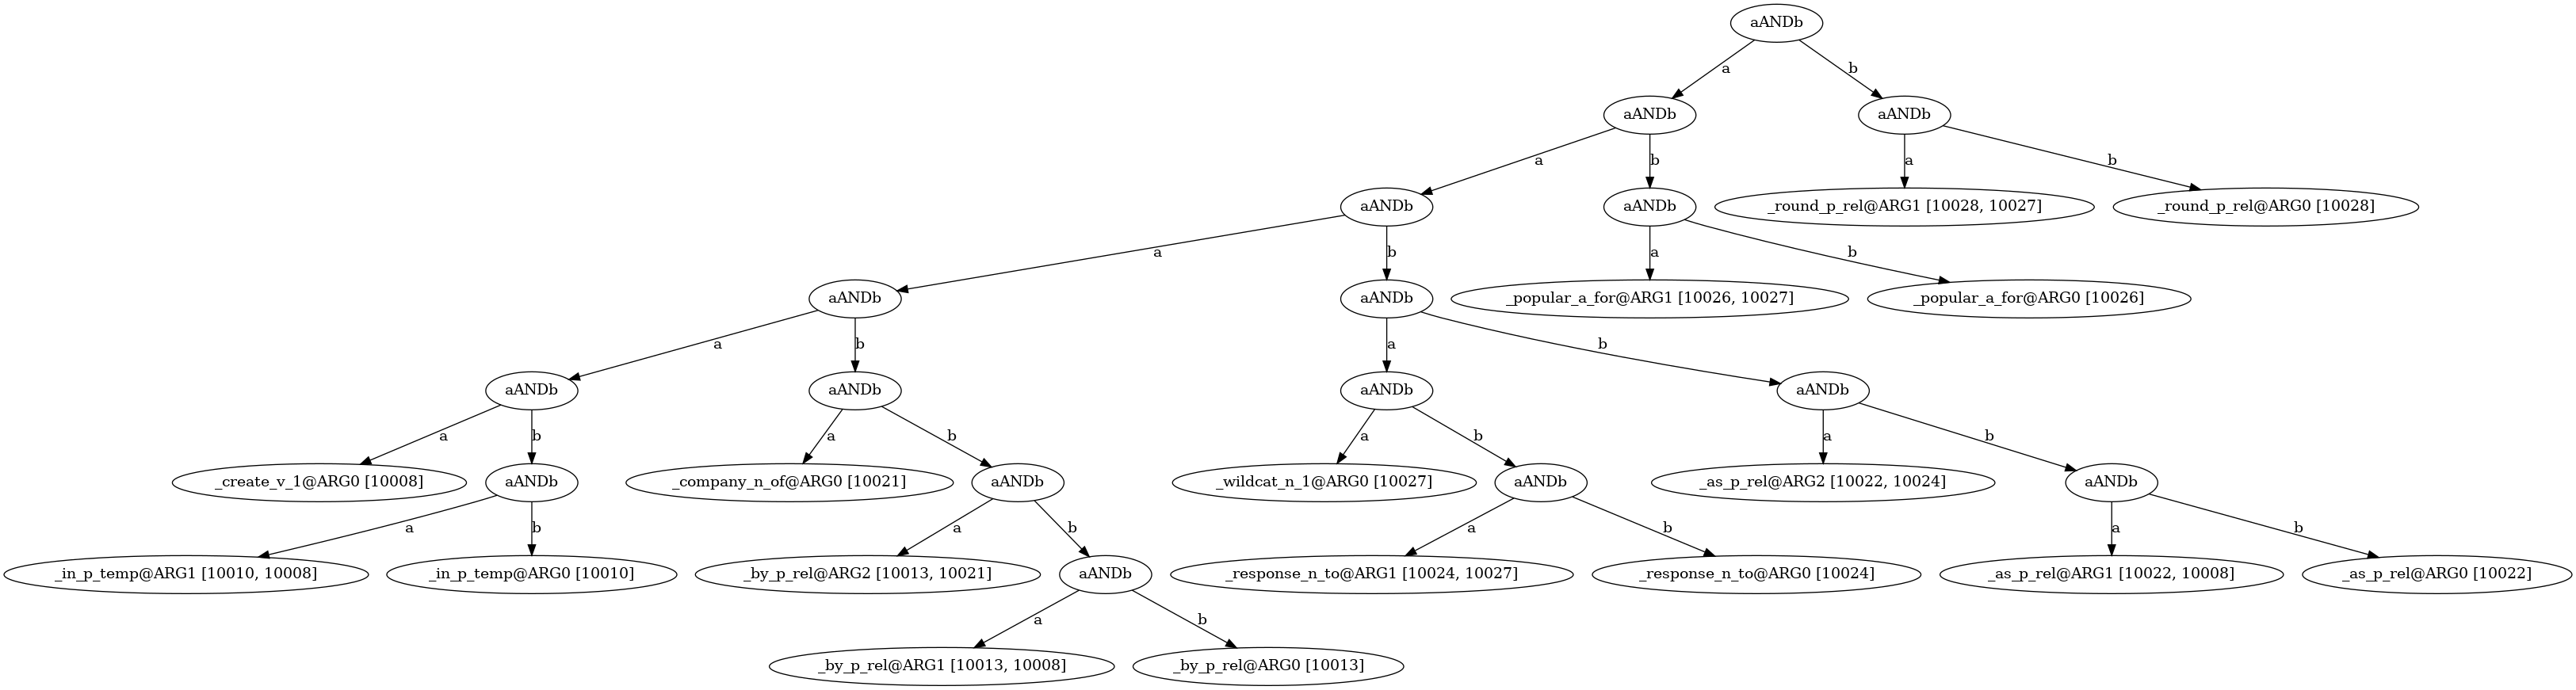

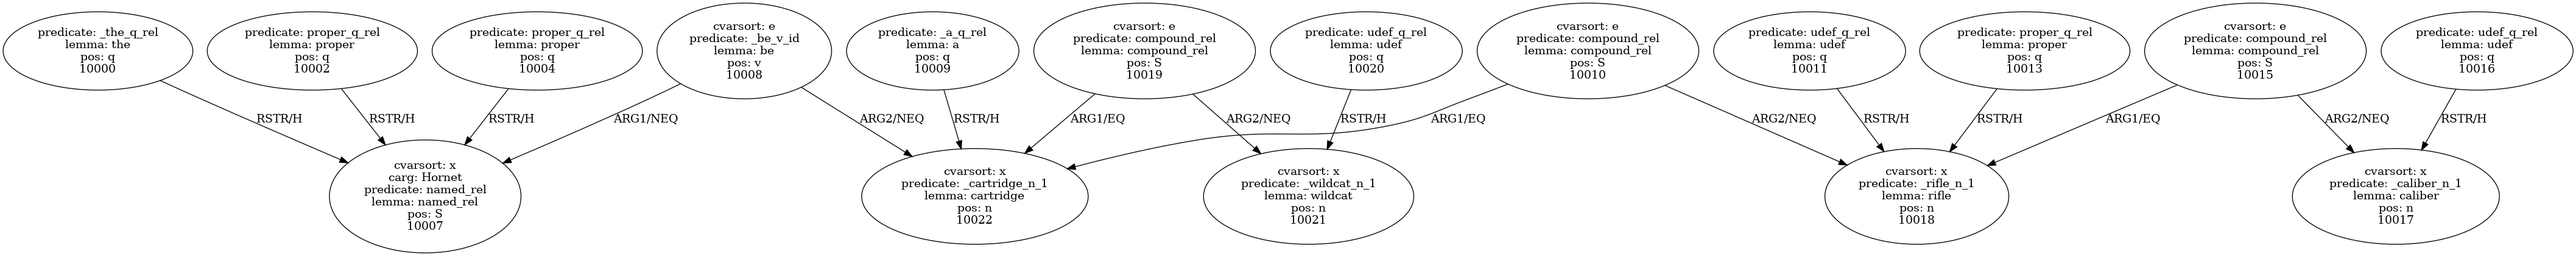

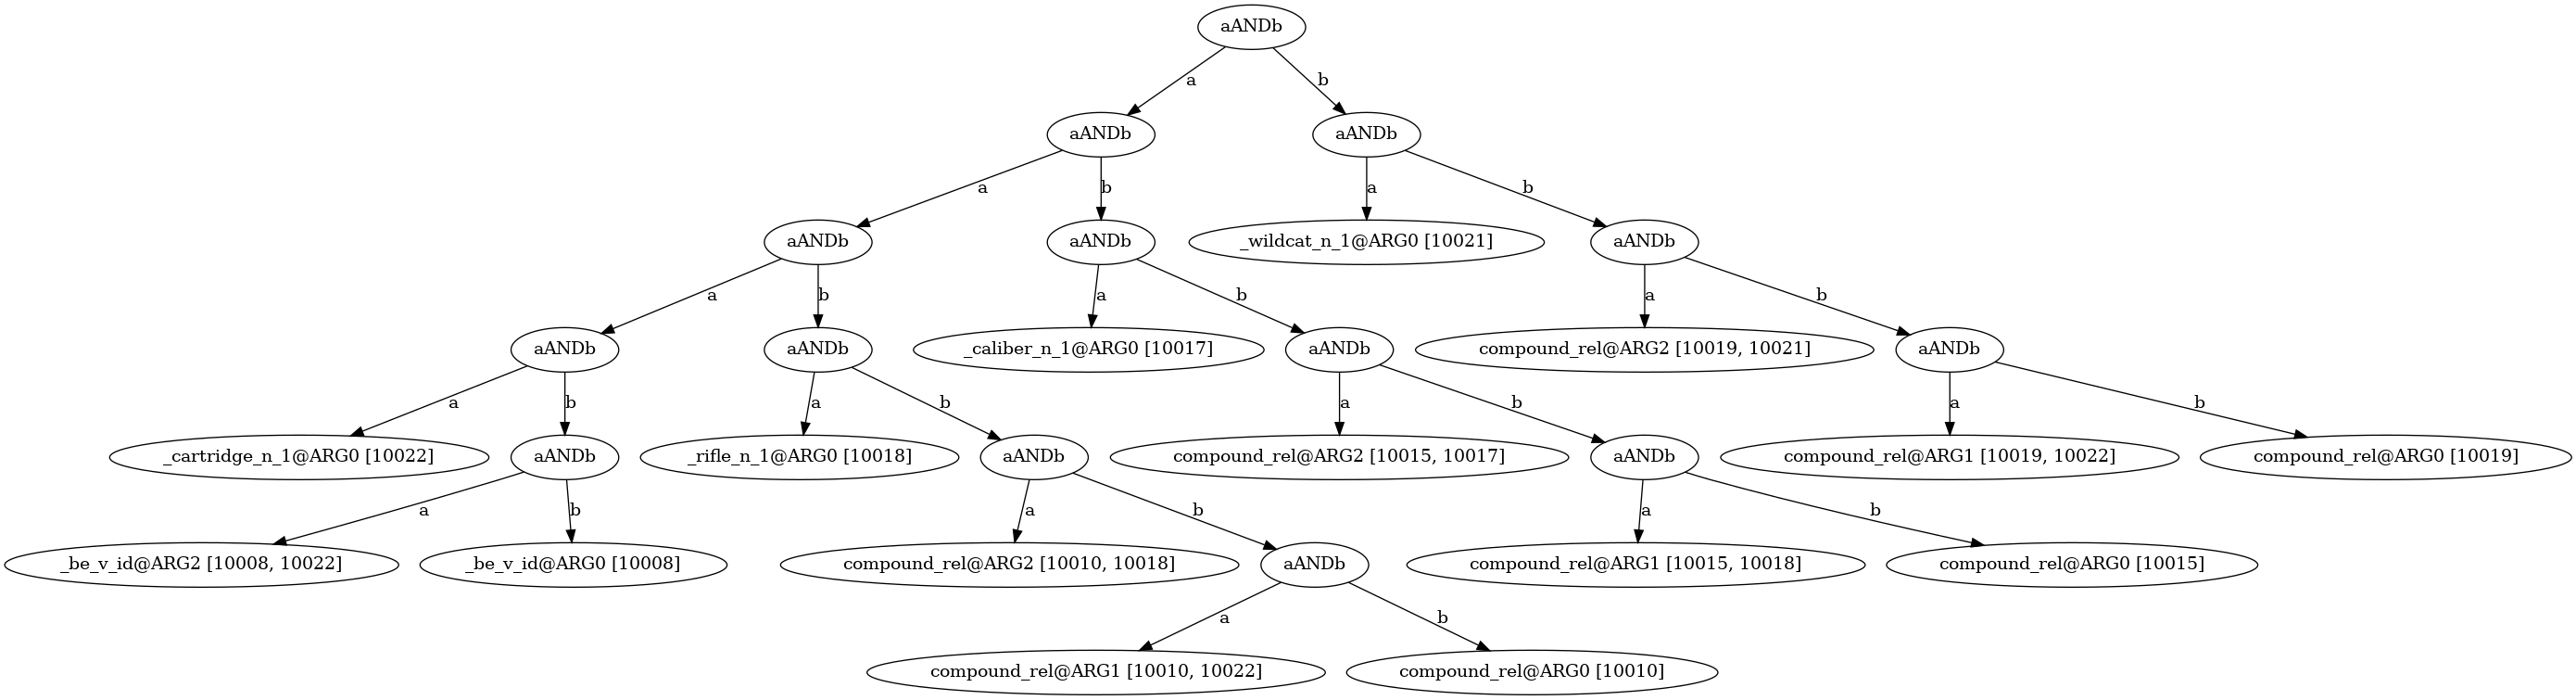

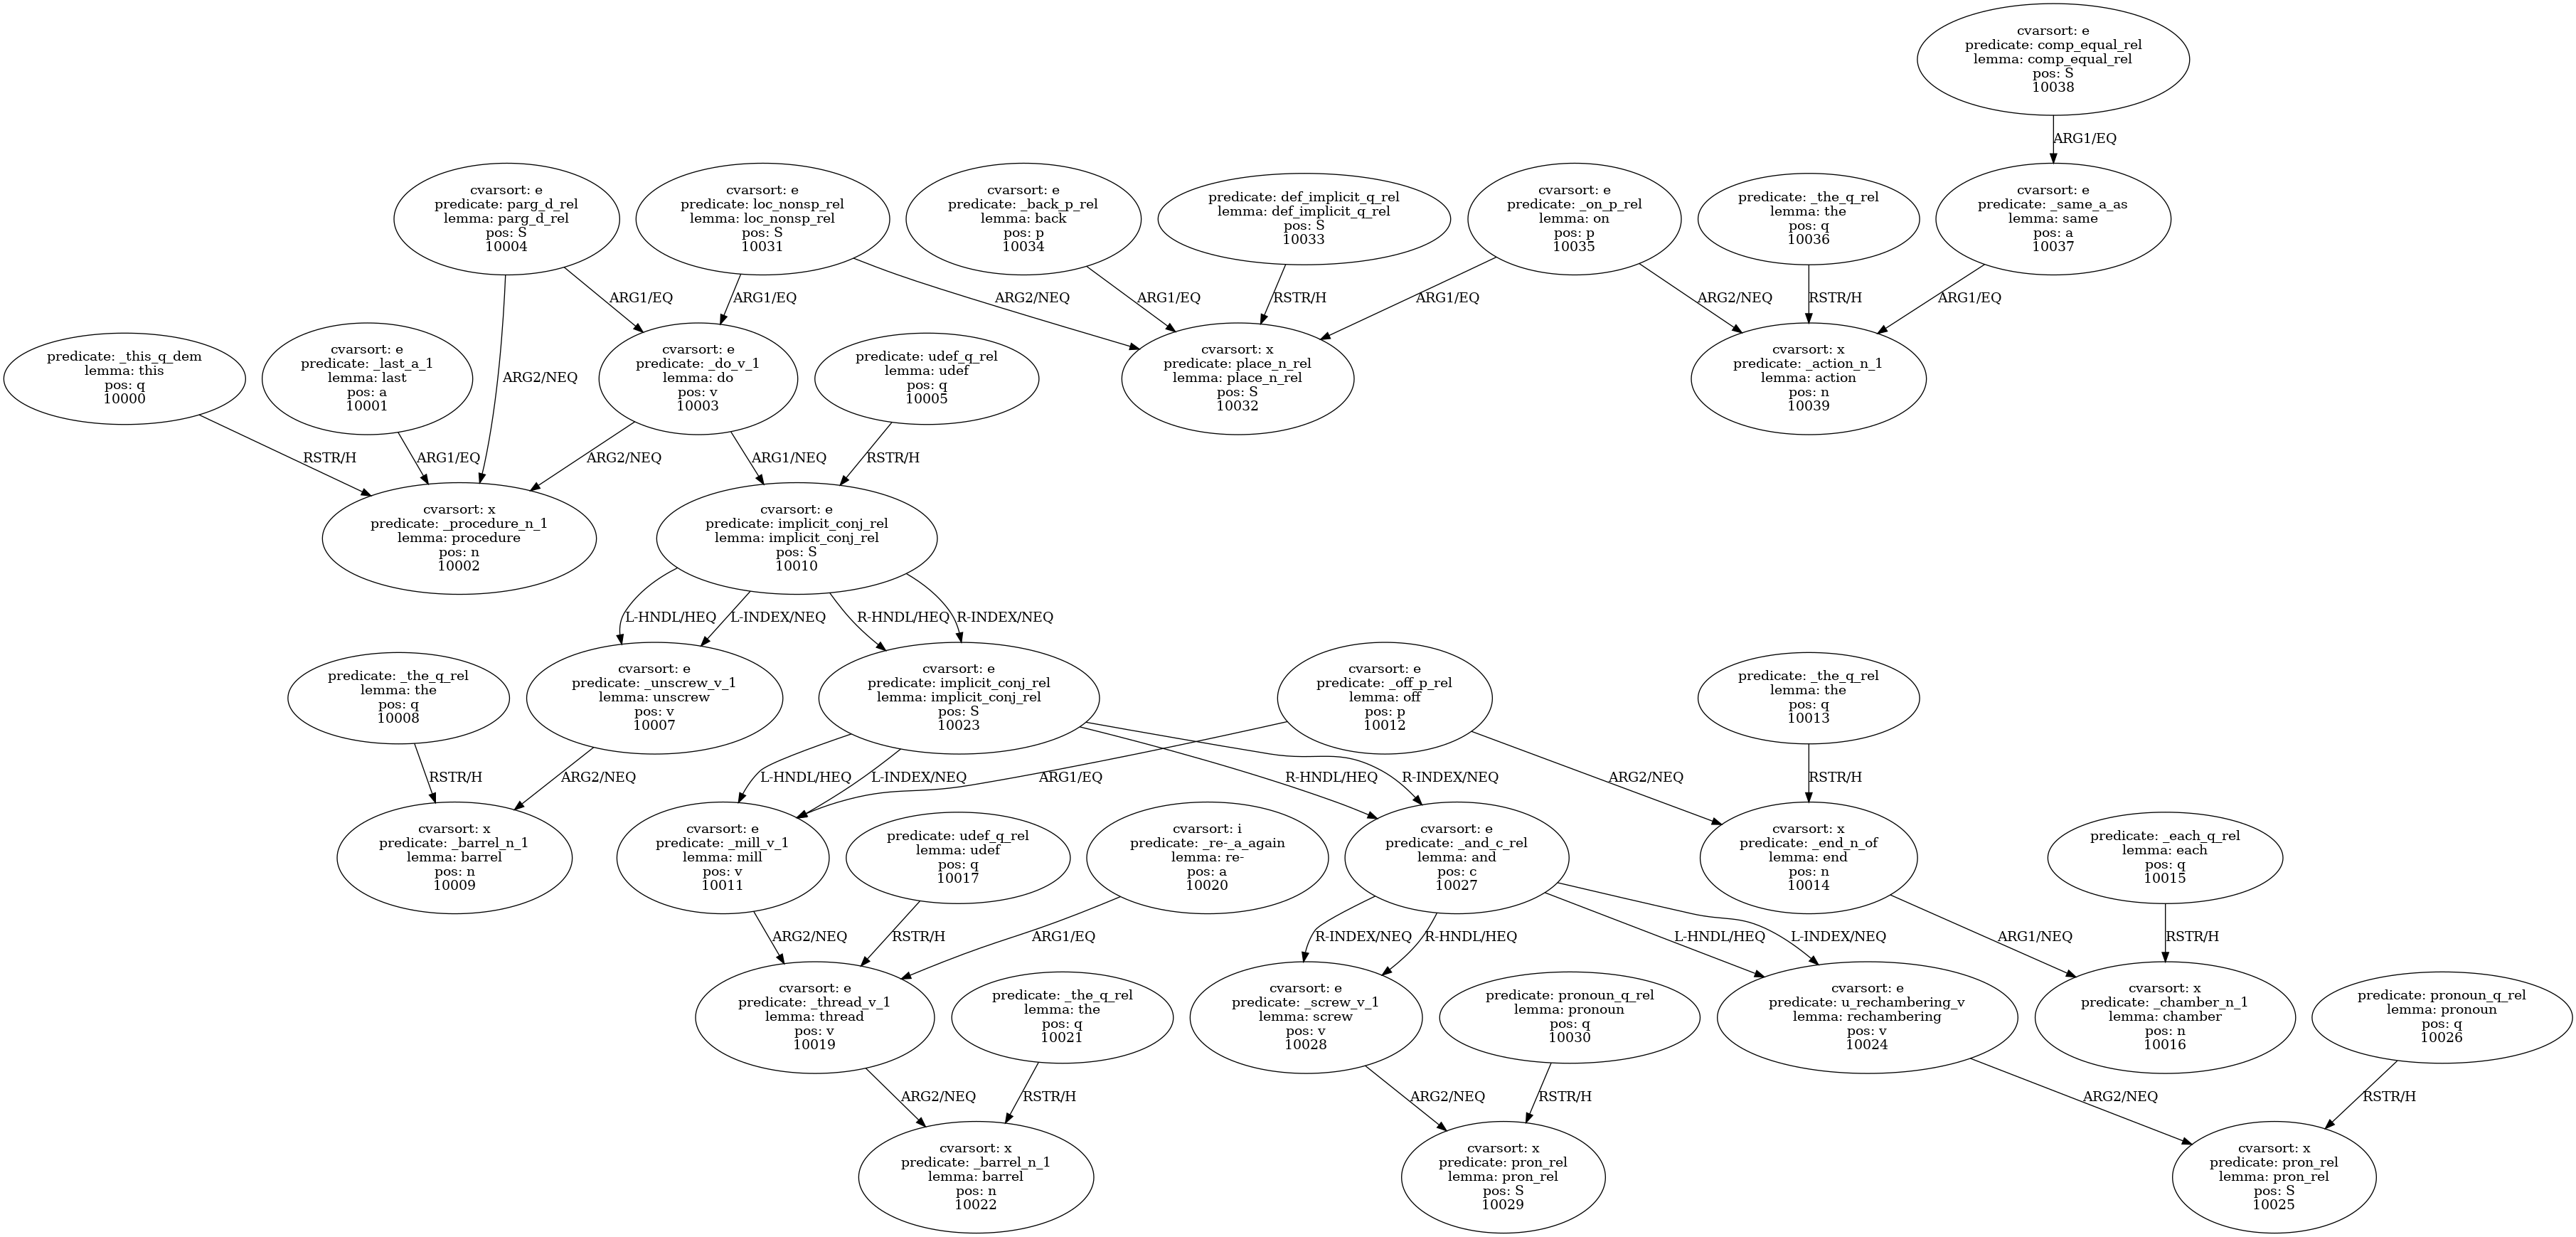

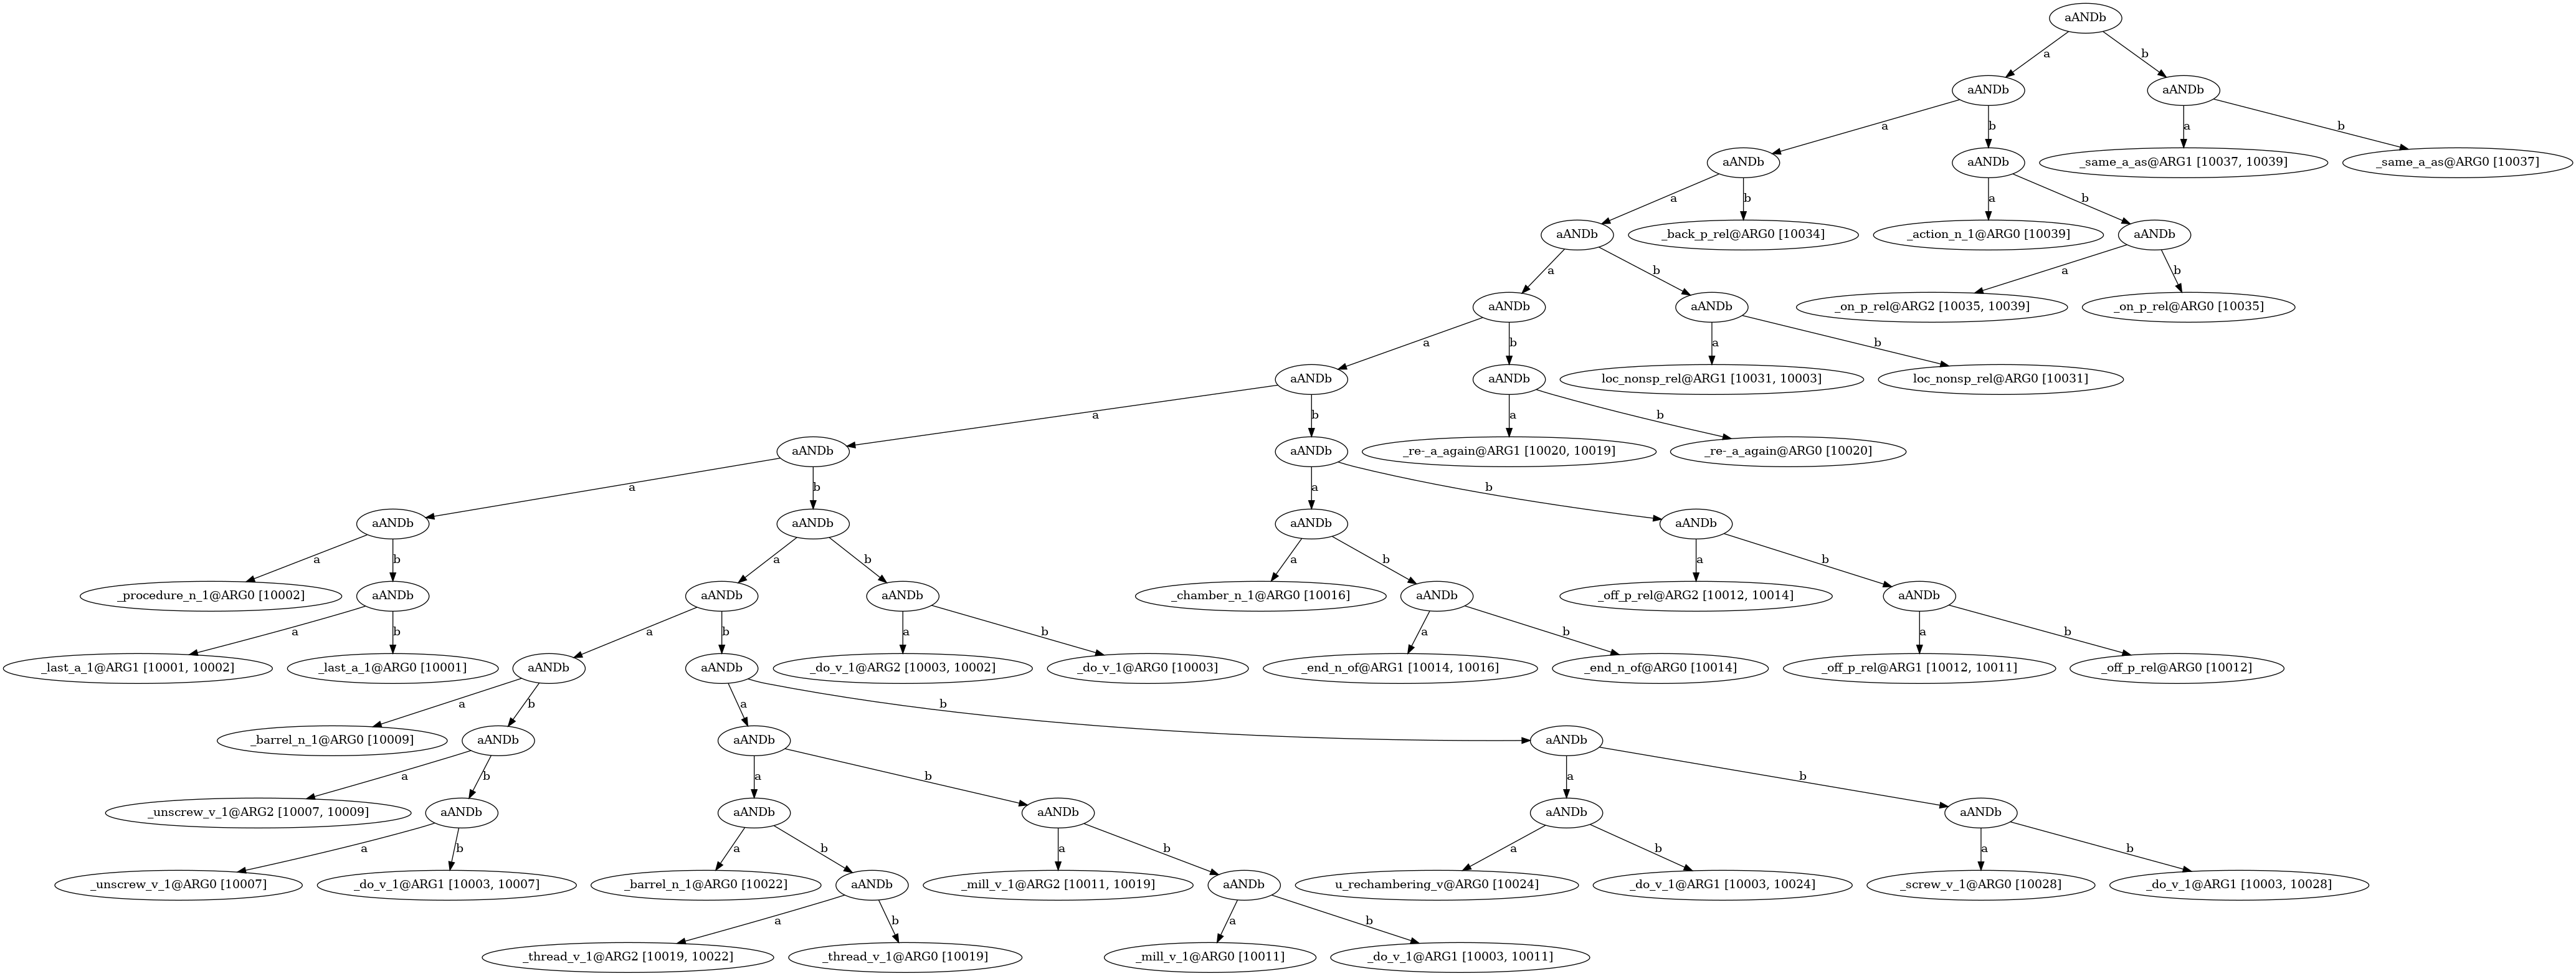

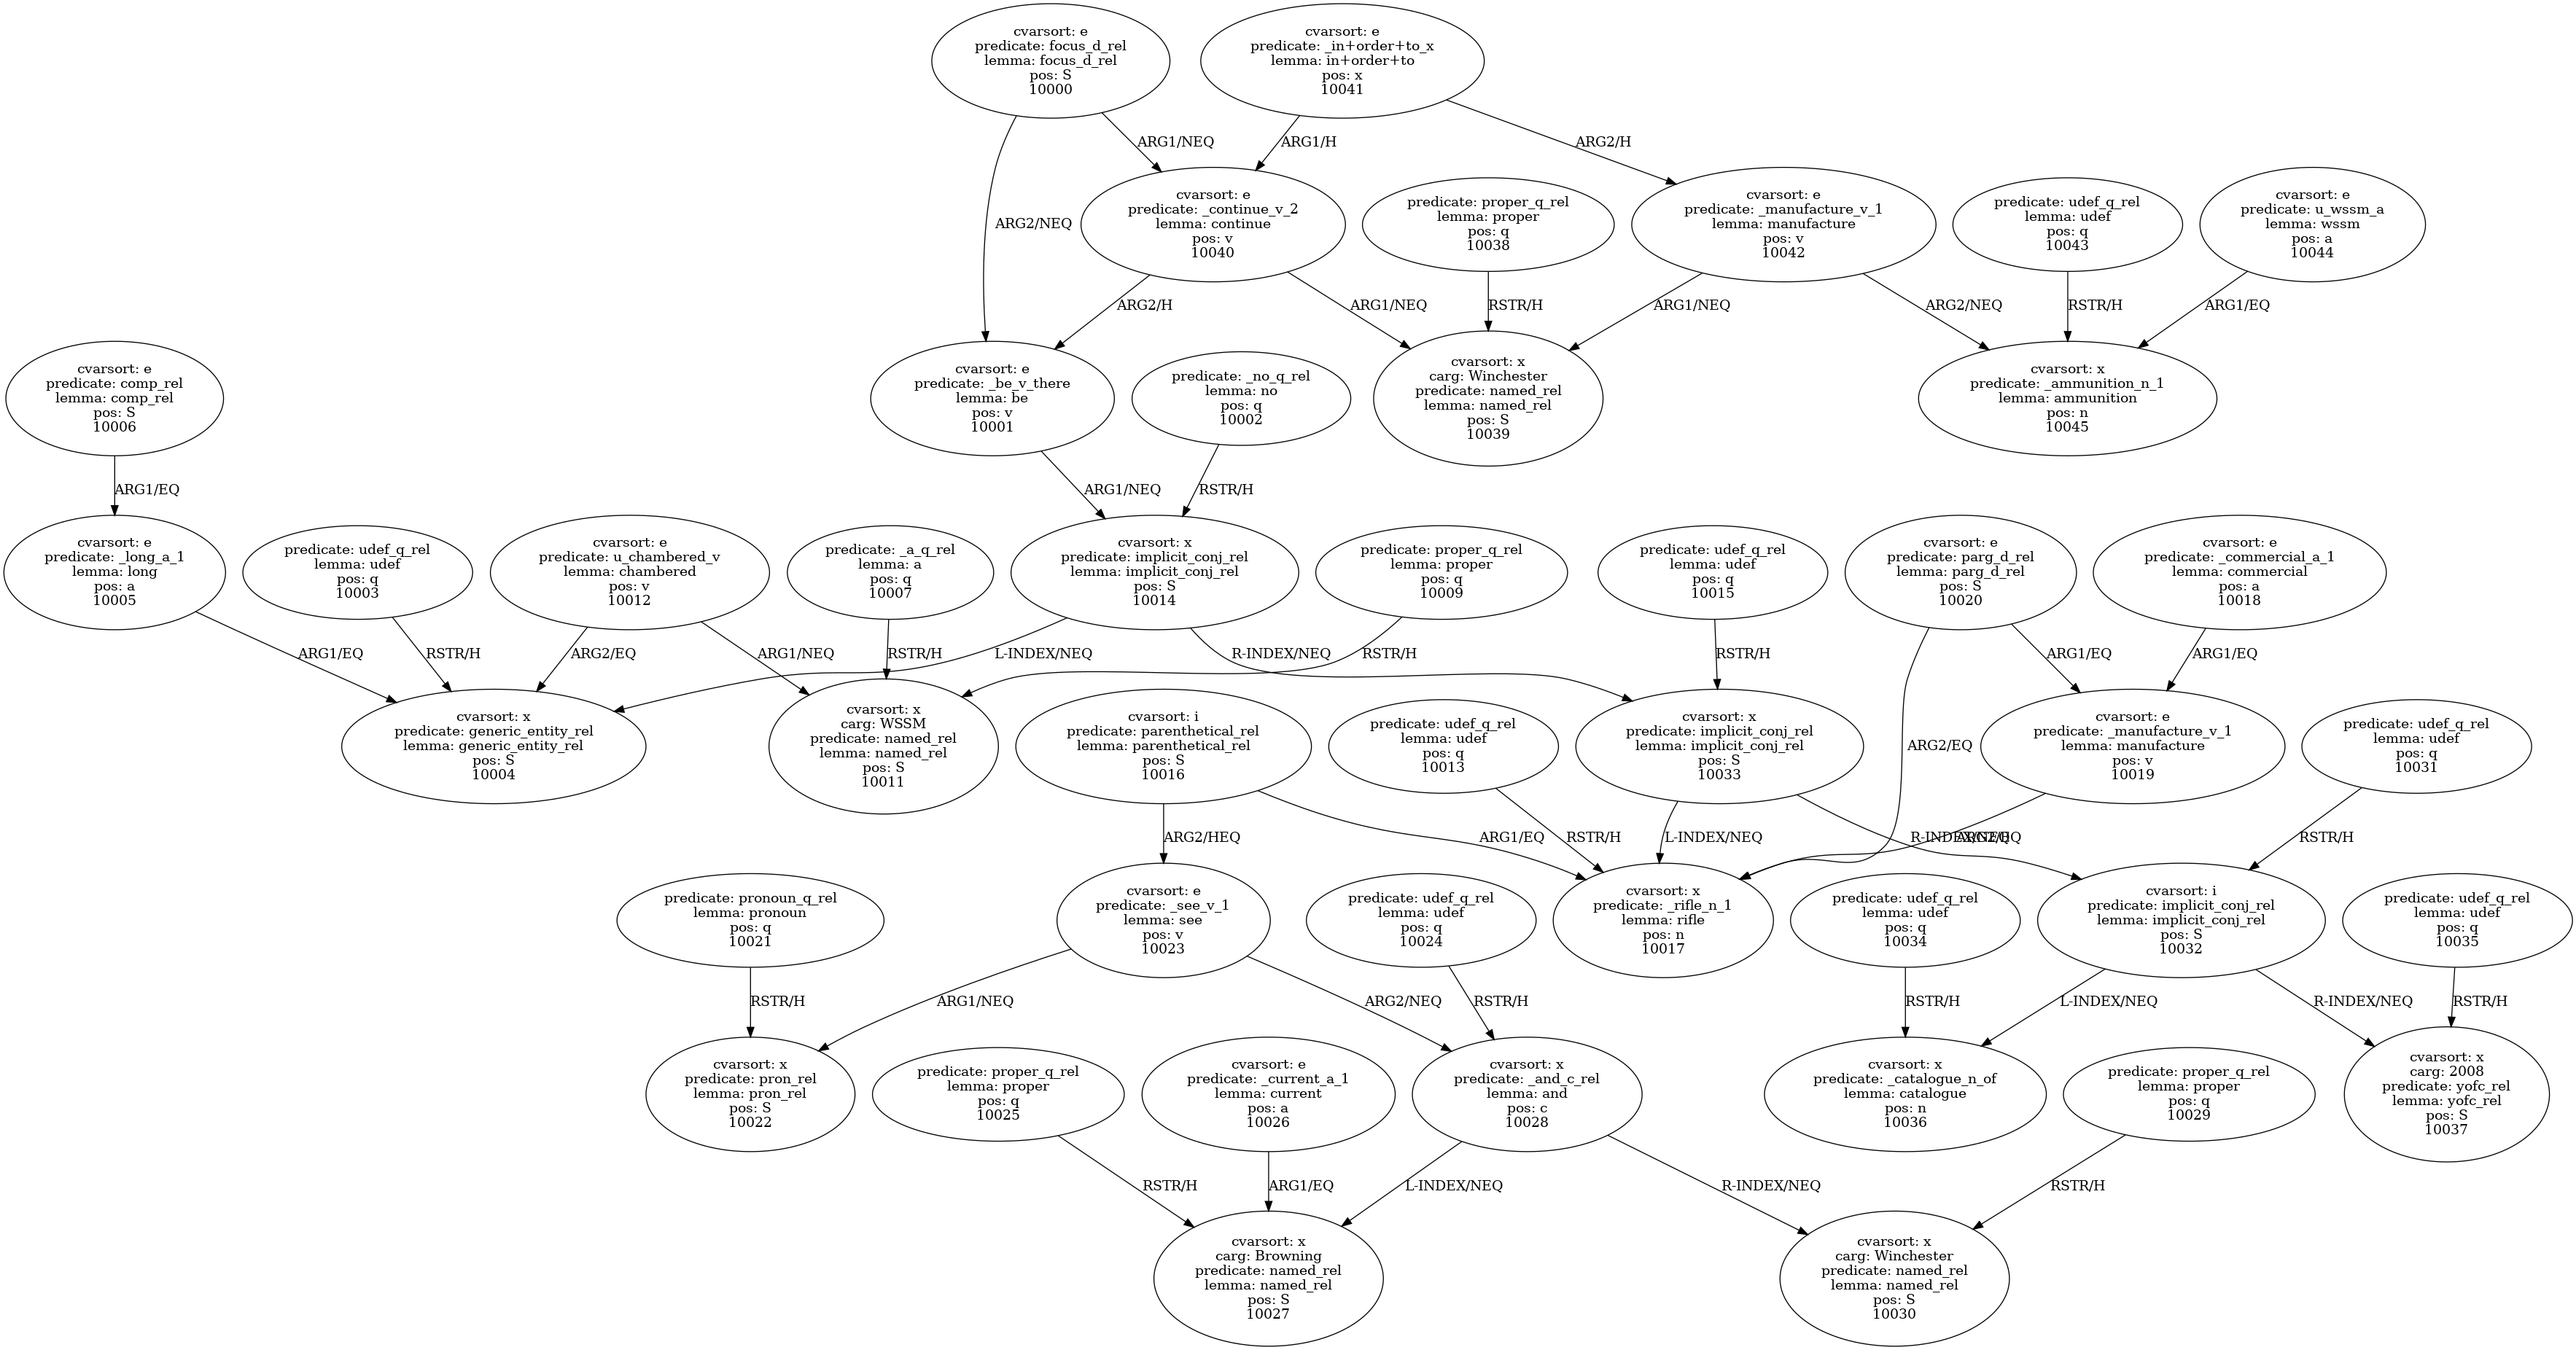

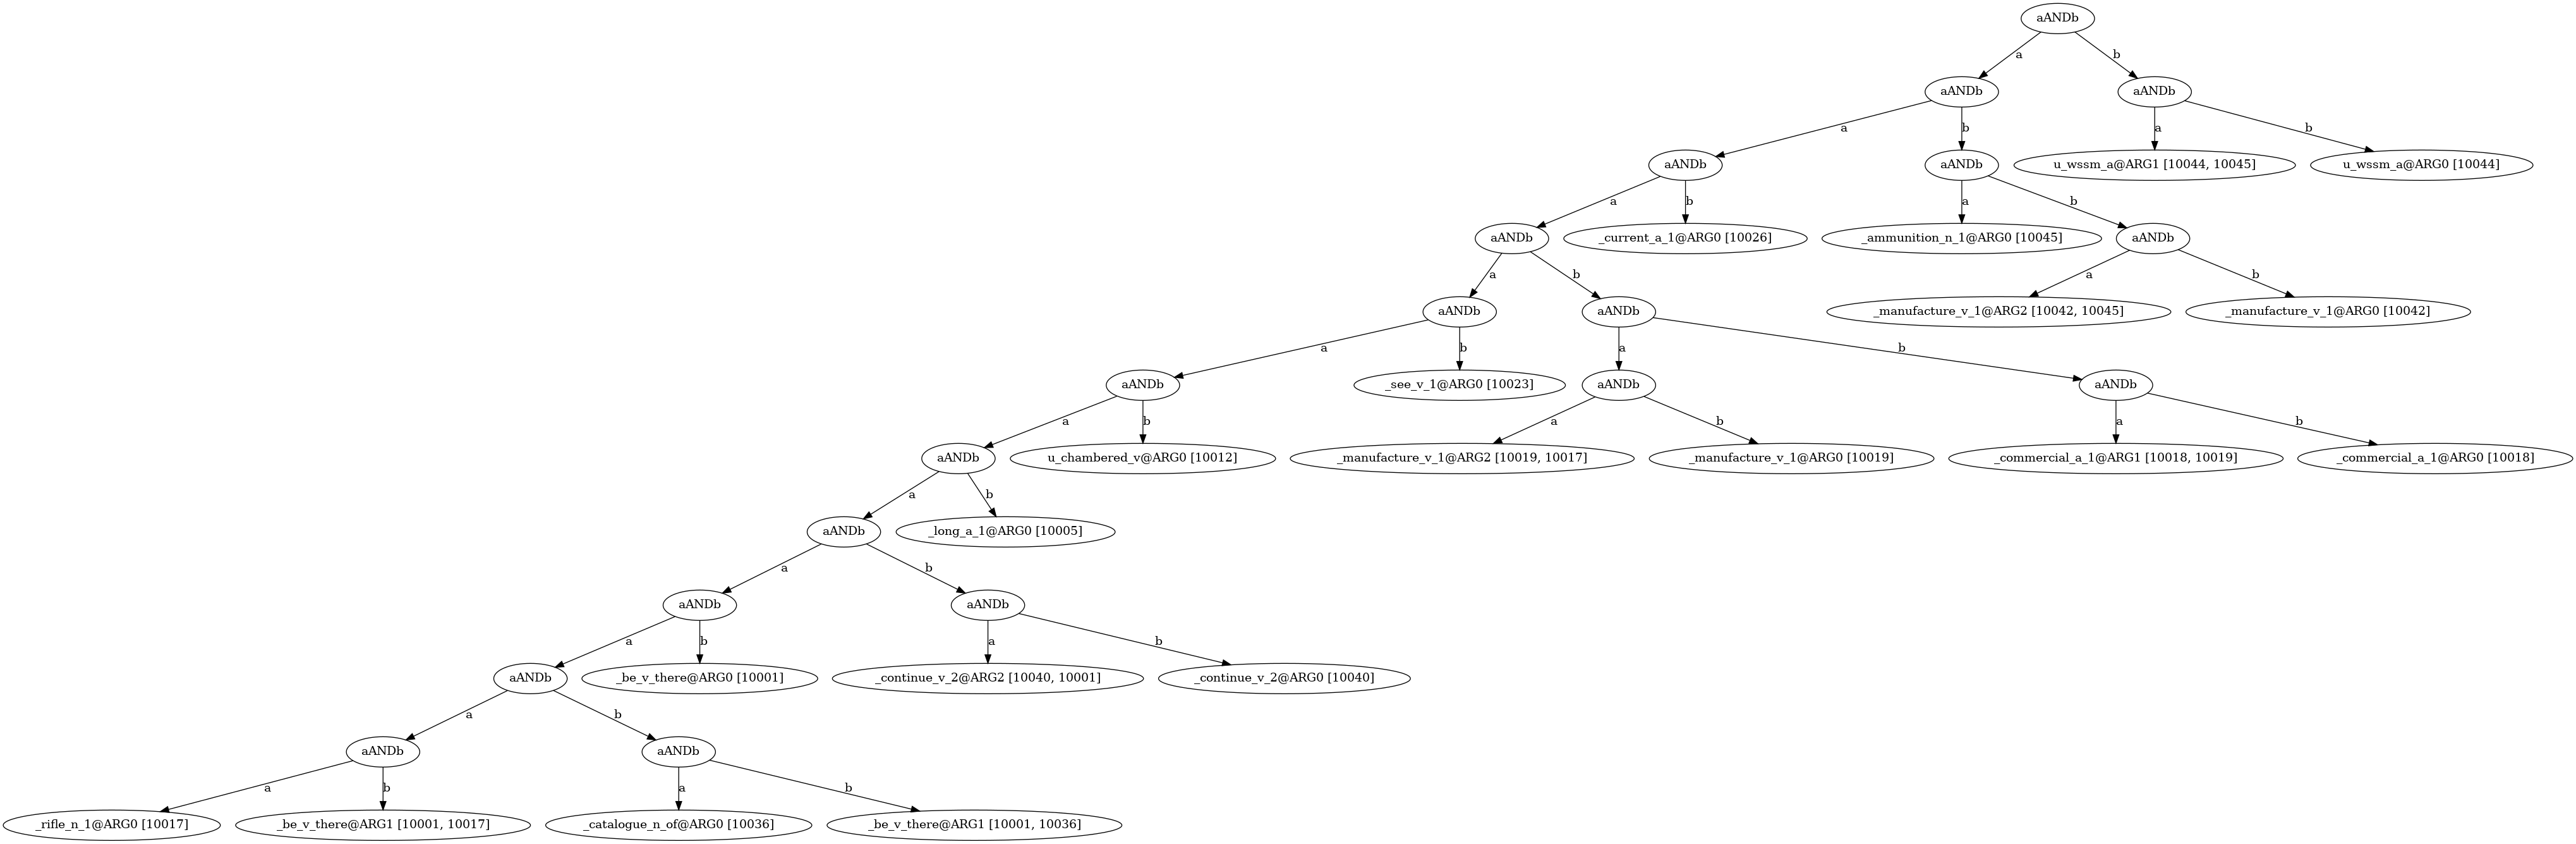

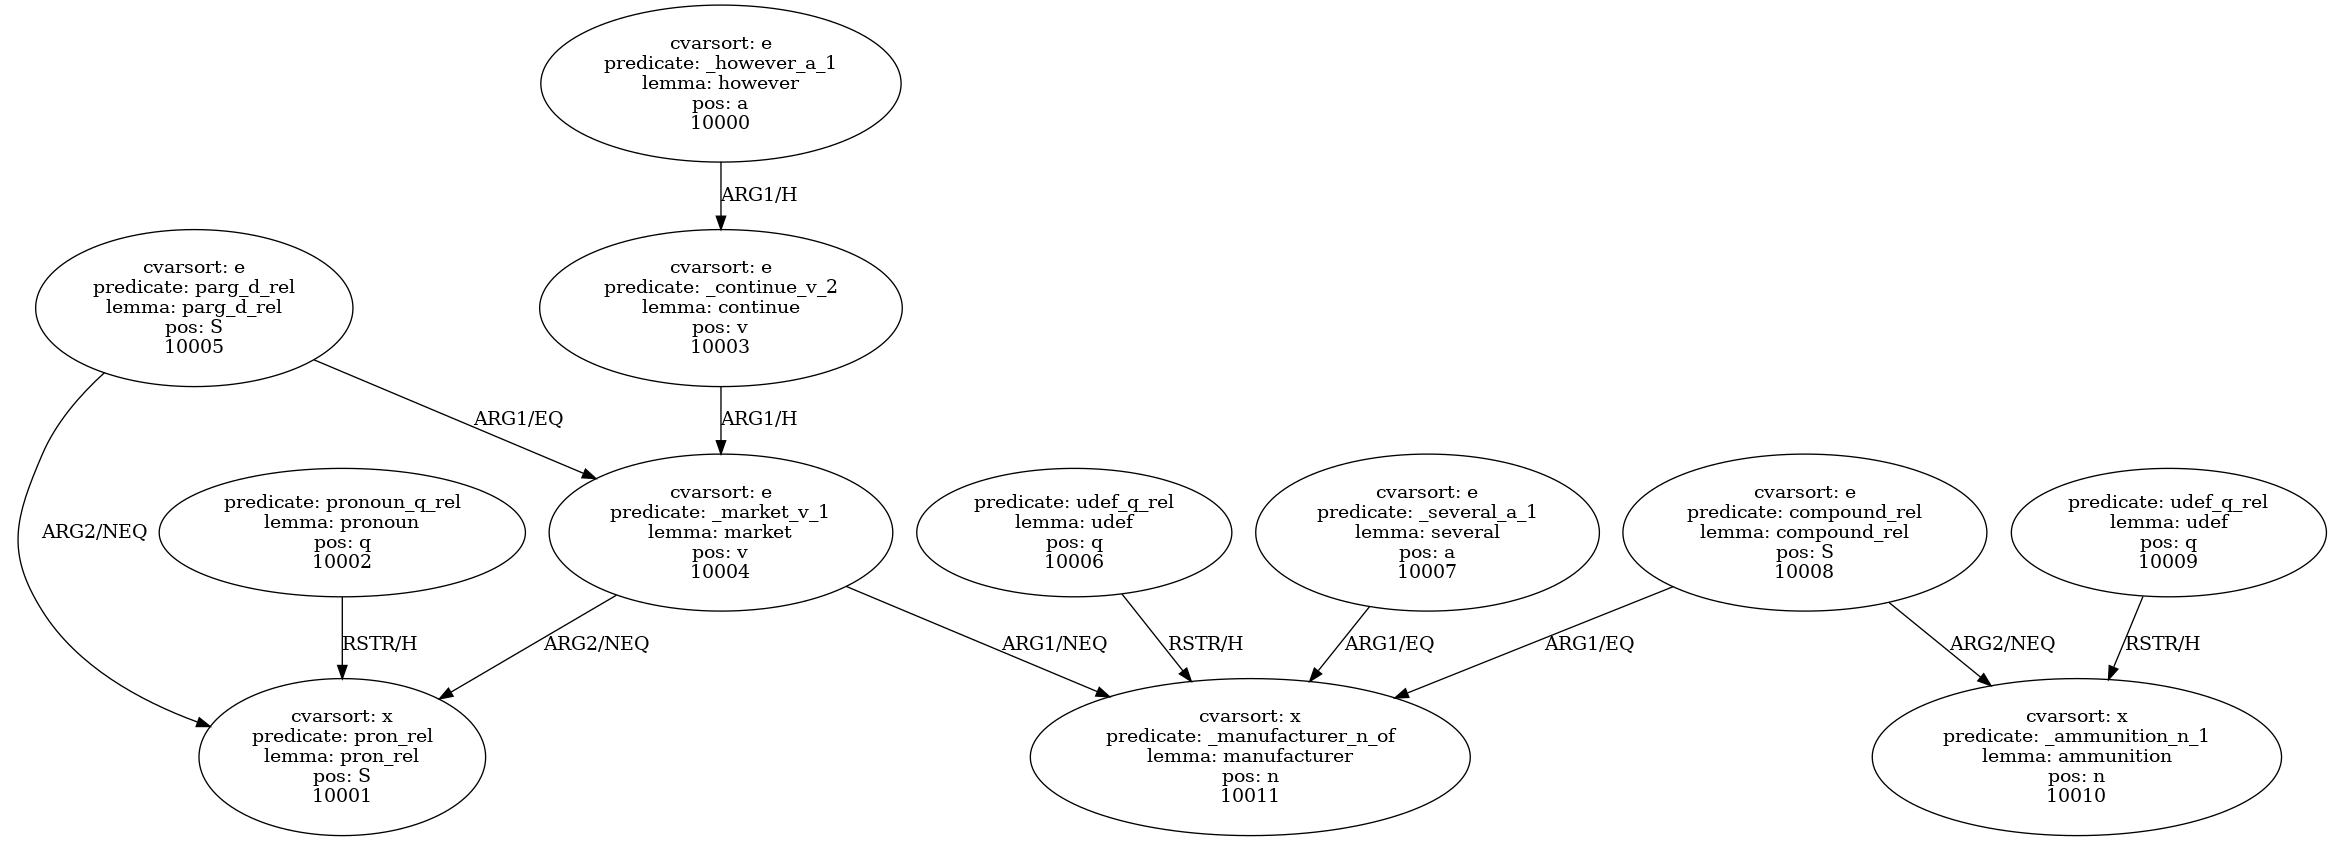

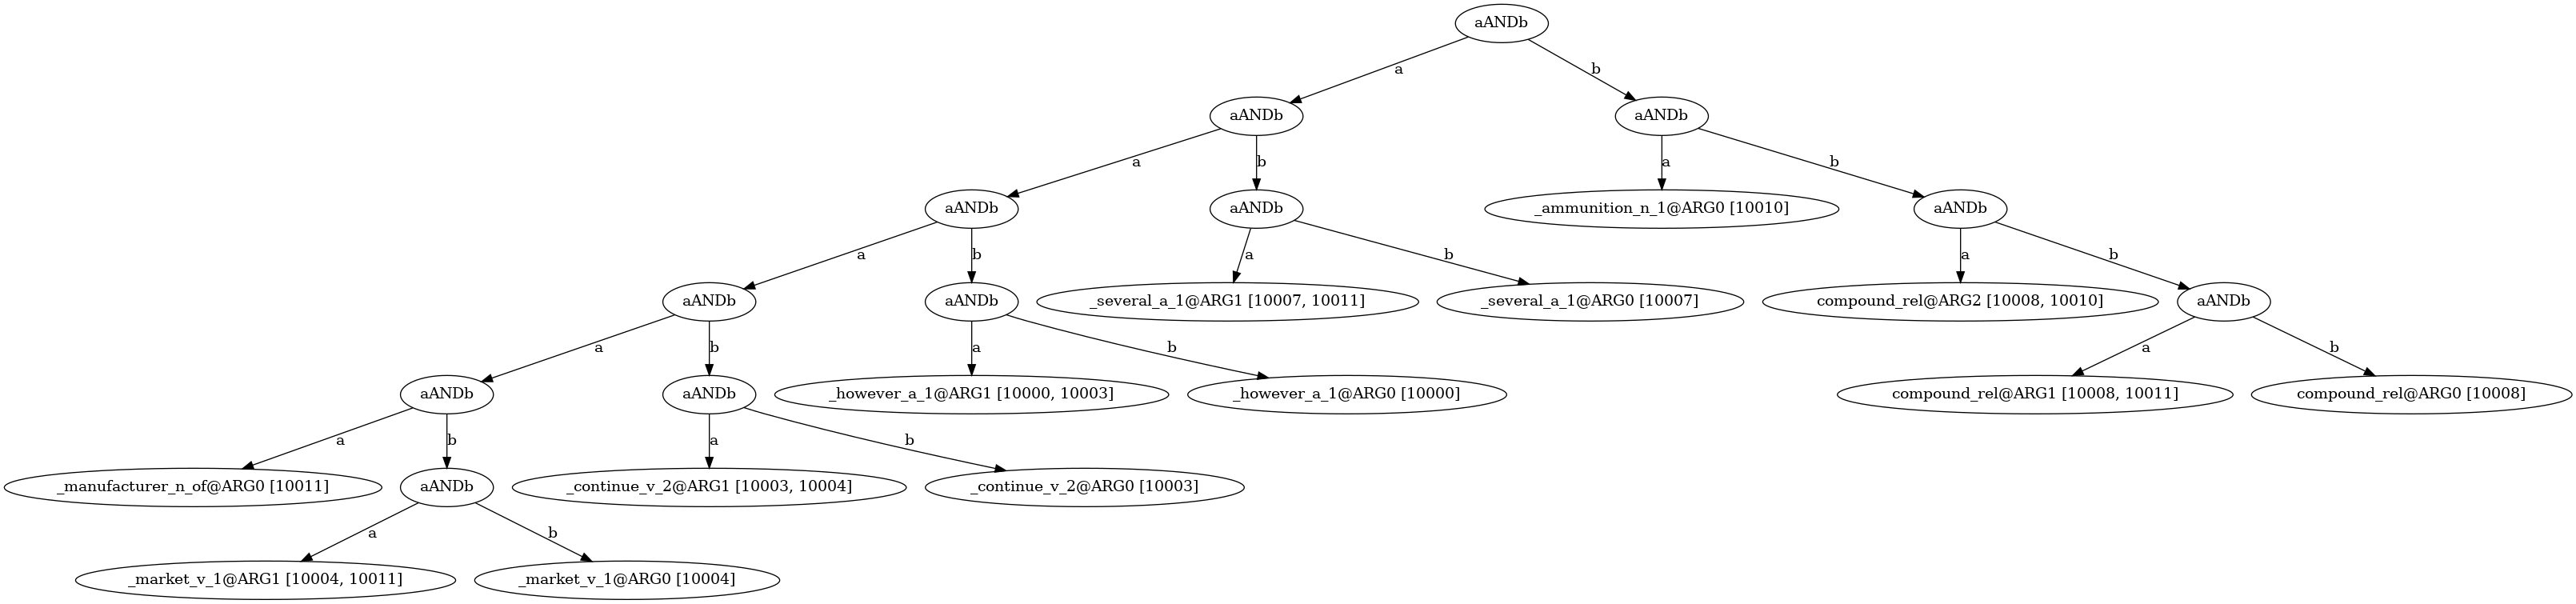

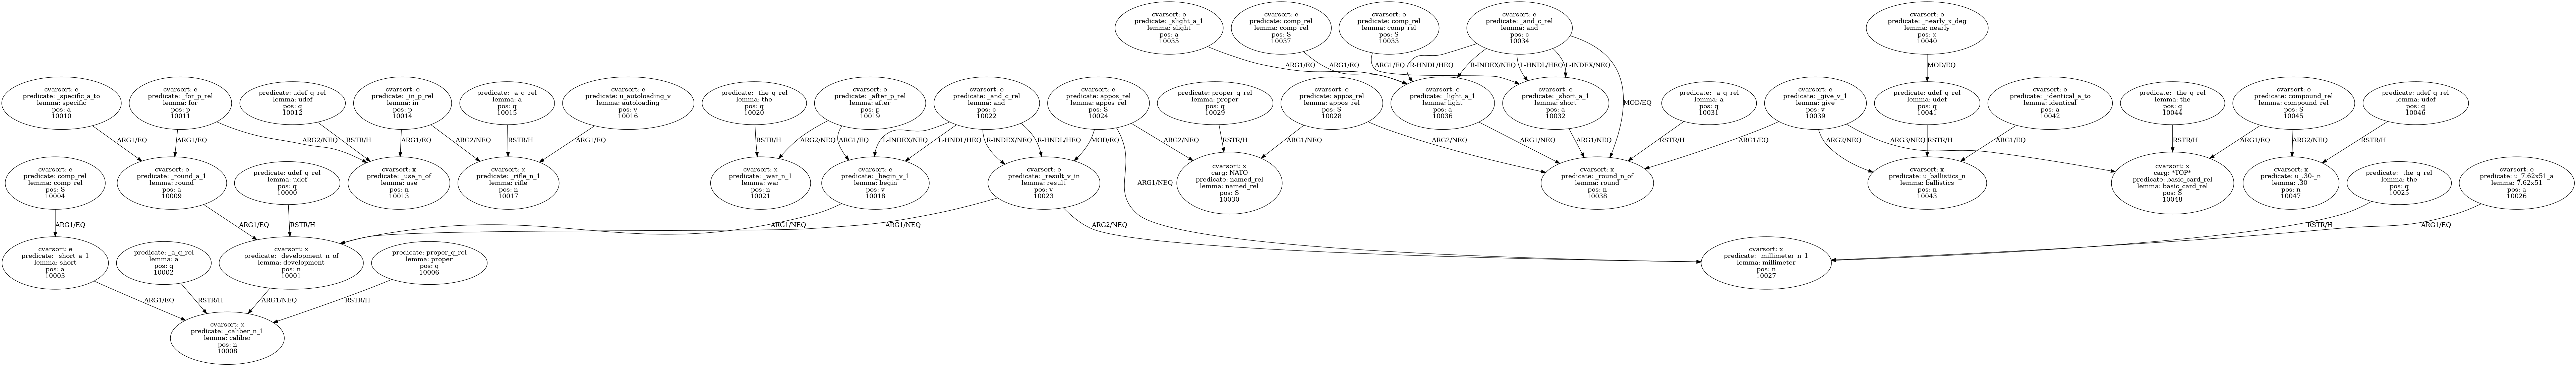

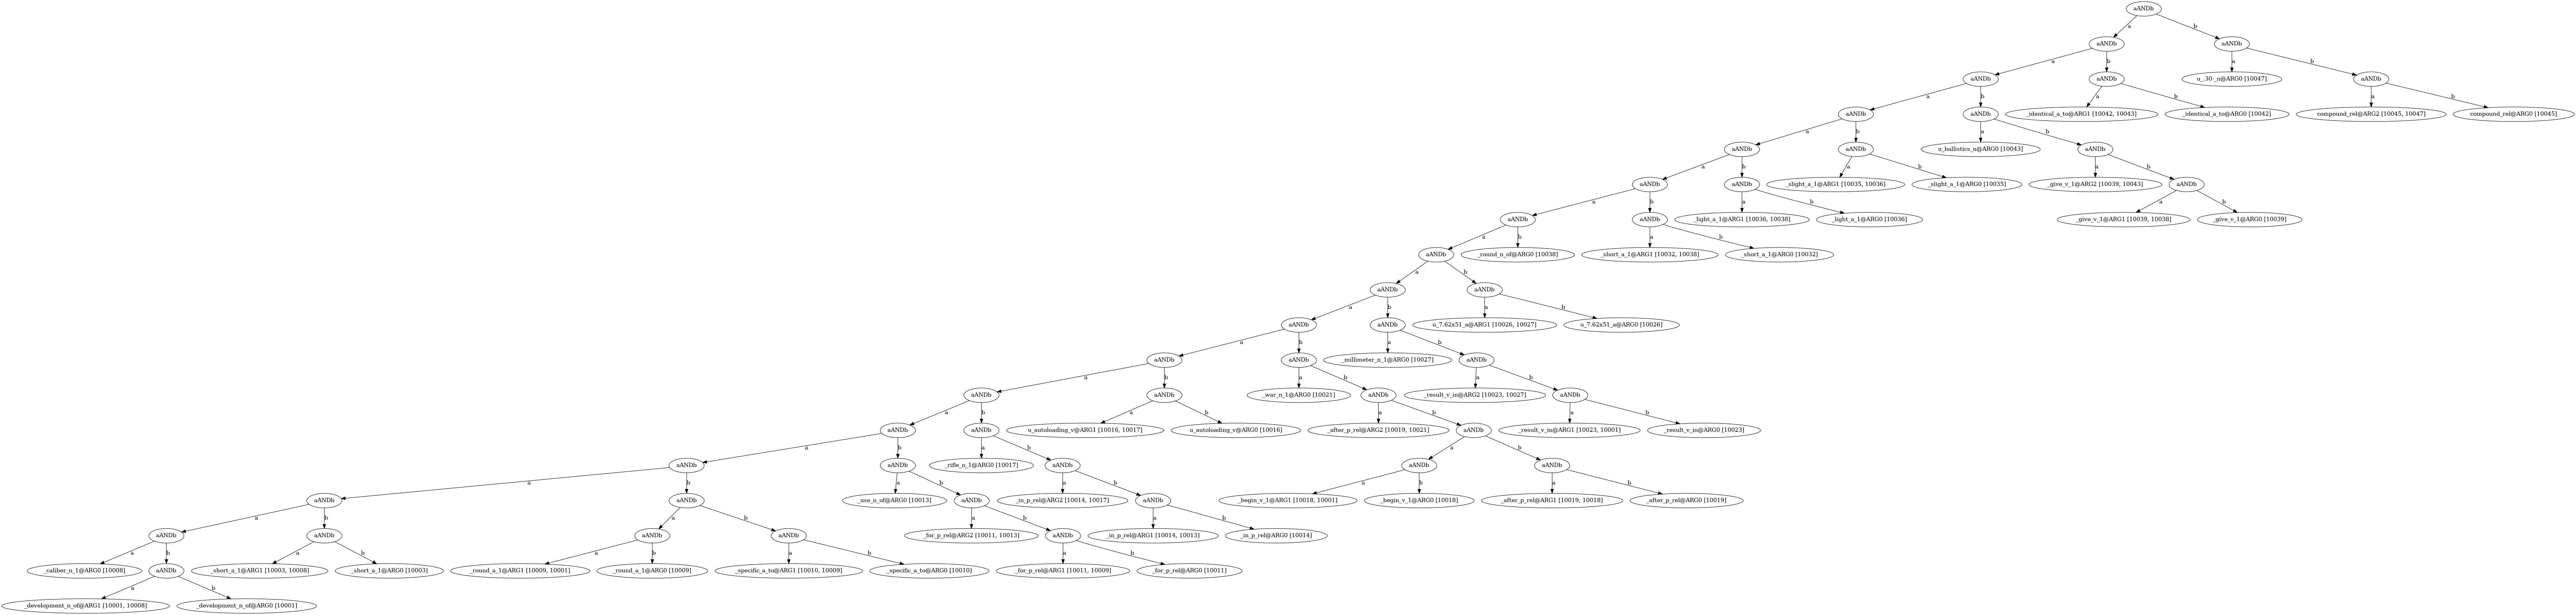

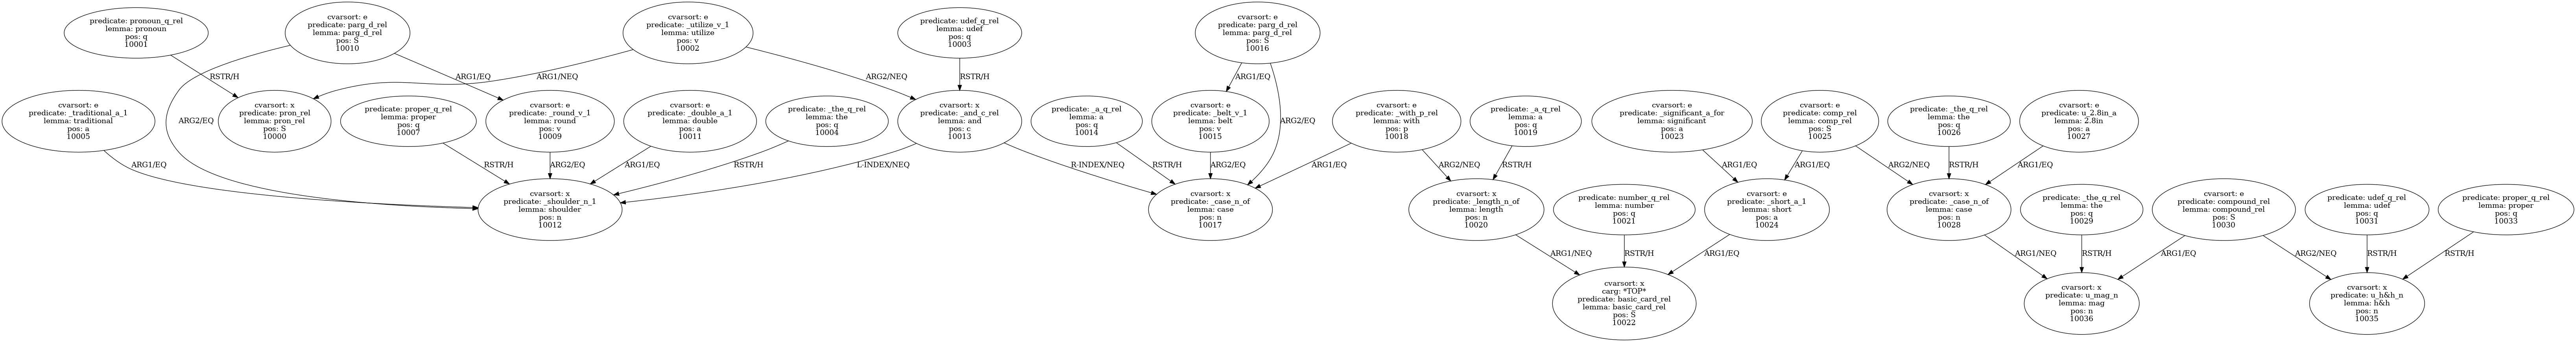

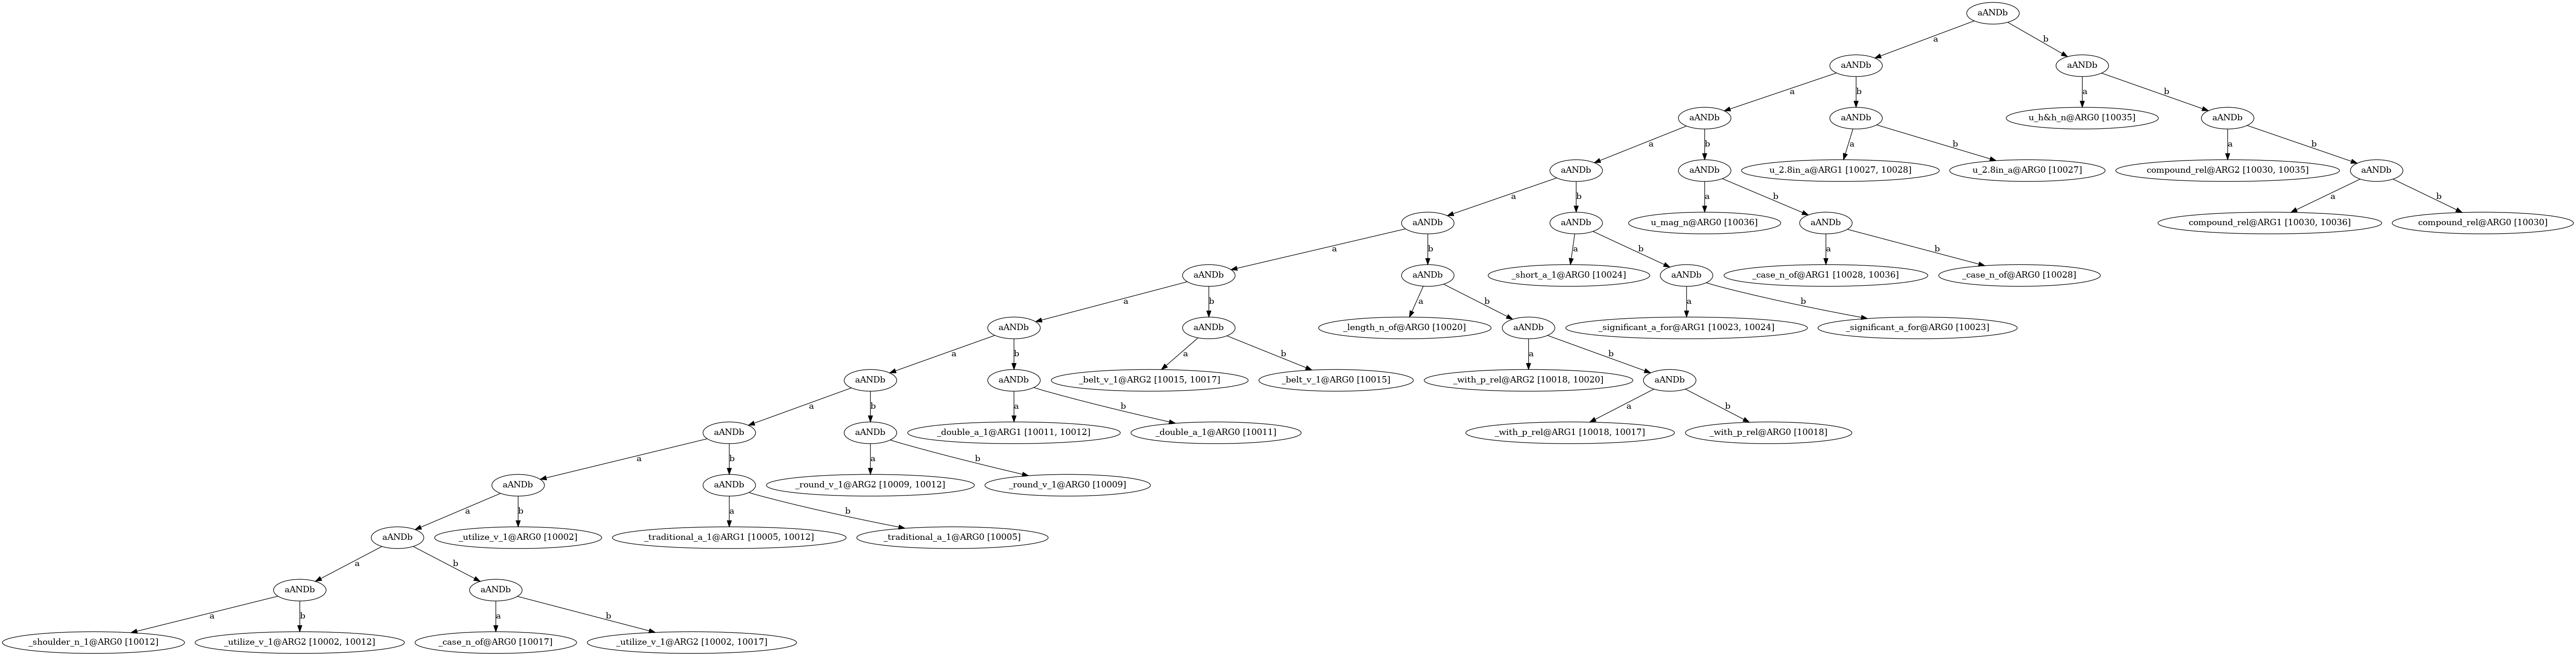

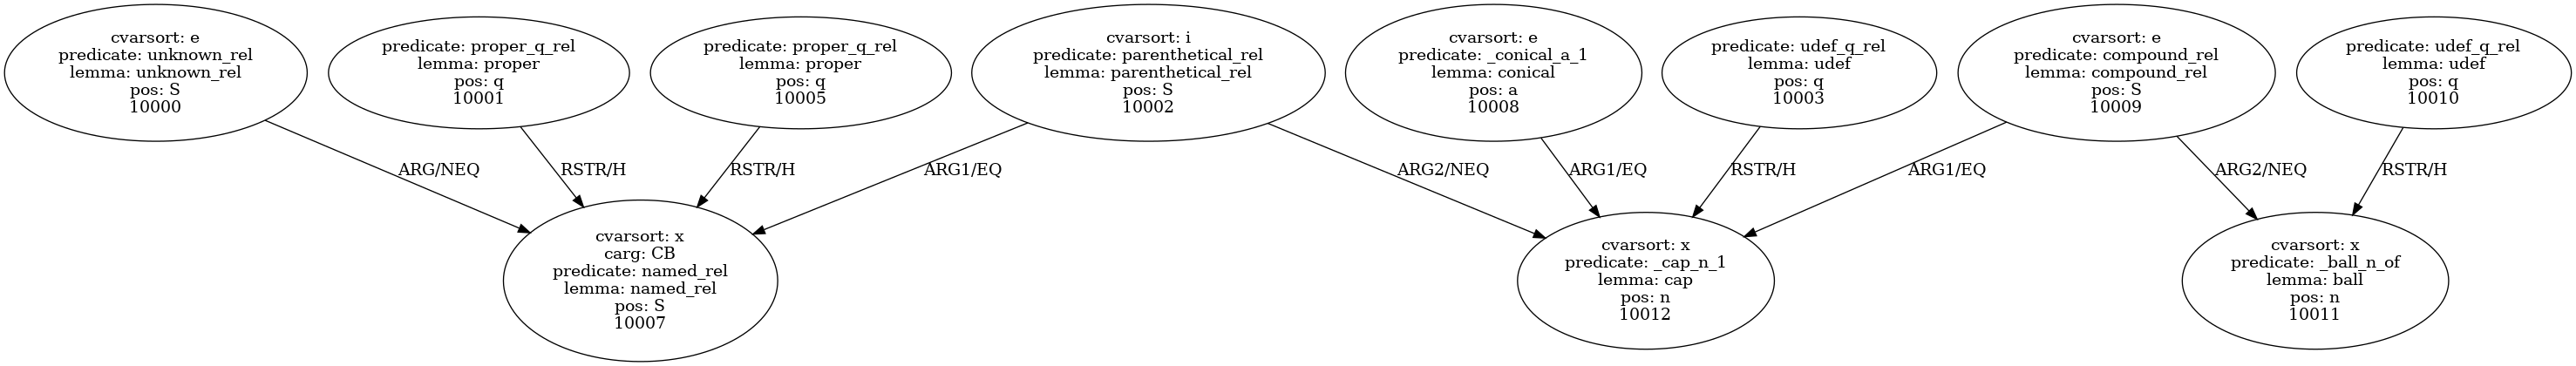

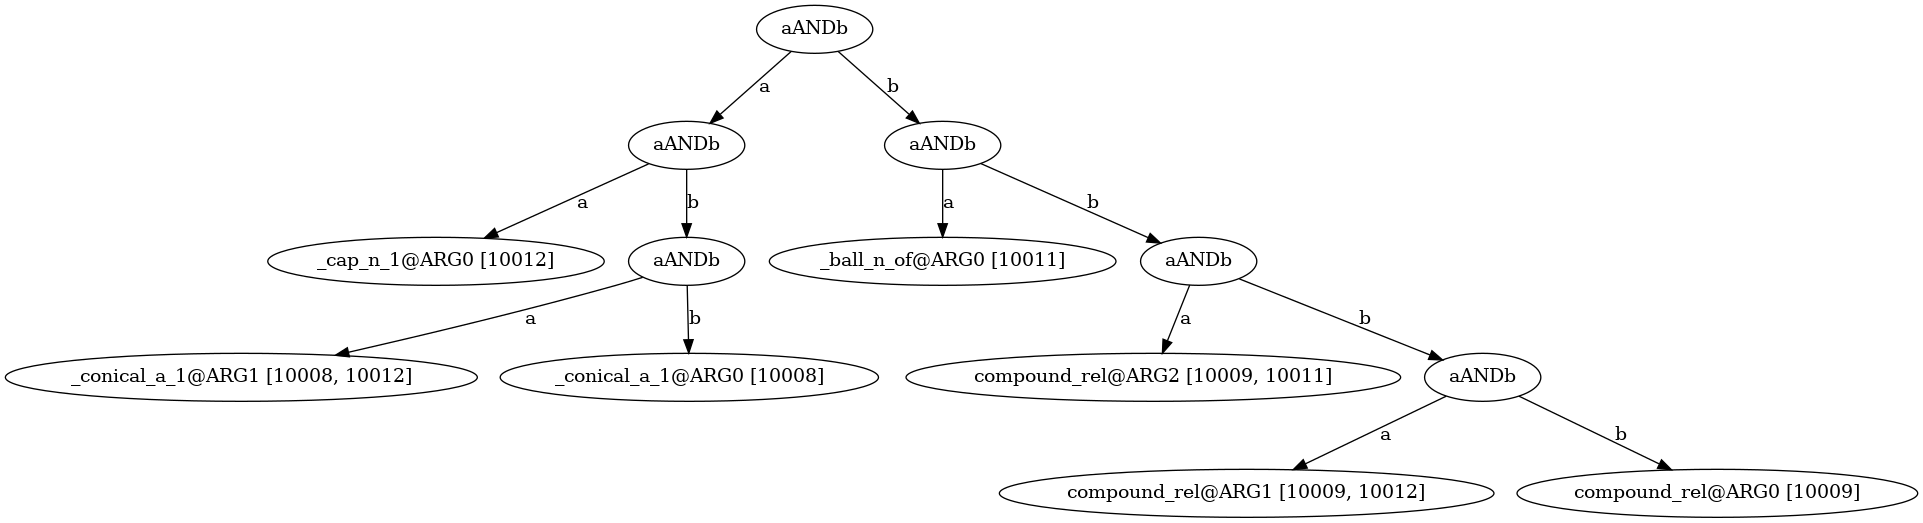

In [ ]:
snt_ids = [
    1000105900010,
    1000108000280,
    1000107900780,
    1000101500010,
    1000102100010,
    1000107800250,
    1000104800150,
    1000108700090,
    1000107100230,
    1000105200080,
    1000102900050
]
for snt_id in snt_ids:
    snt_id = str(snt_id)
    dmrs_save_path = "./figures/dmrs_{}.png".format(snt_id)
    logic_expr_tree_save_path = "./figures/logic_expr_{}.png".format(snt_id)
    x = Image(filename=dmrs_save_path) 
    y = Image(filename=logic_expr_tree_save_path) 
    display(x, y)

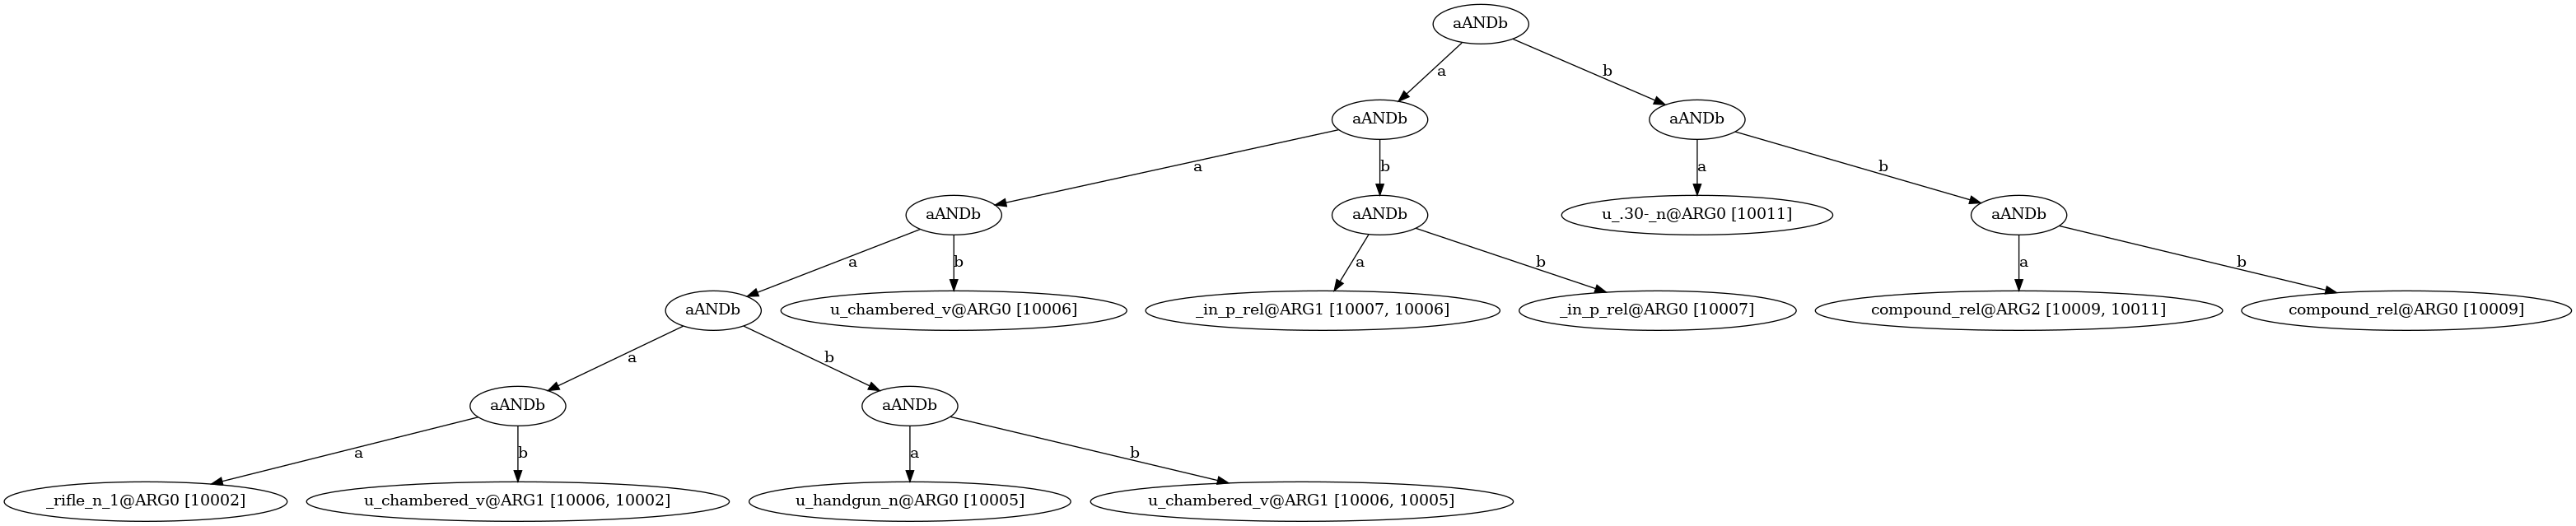

In [ ]:
save_path = "./figures/logic_expr_1000108000280.png"
Image(save_path)

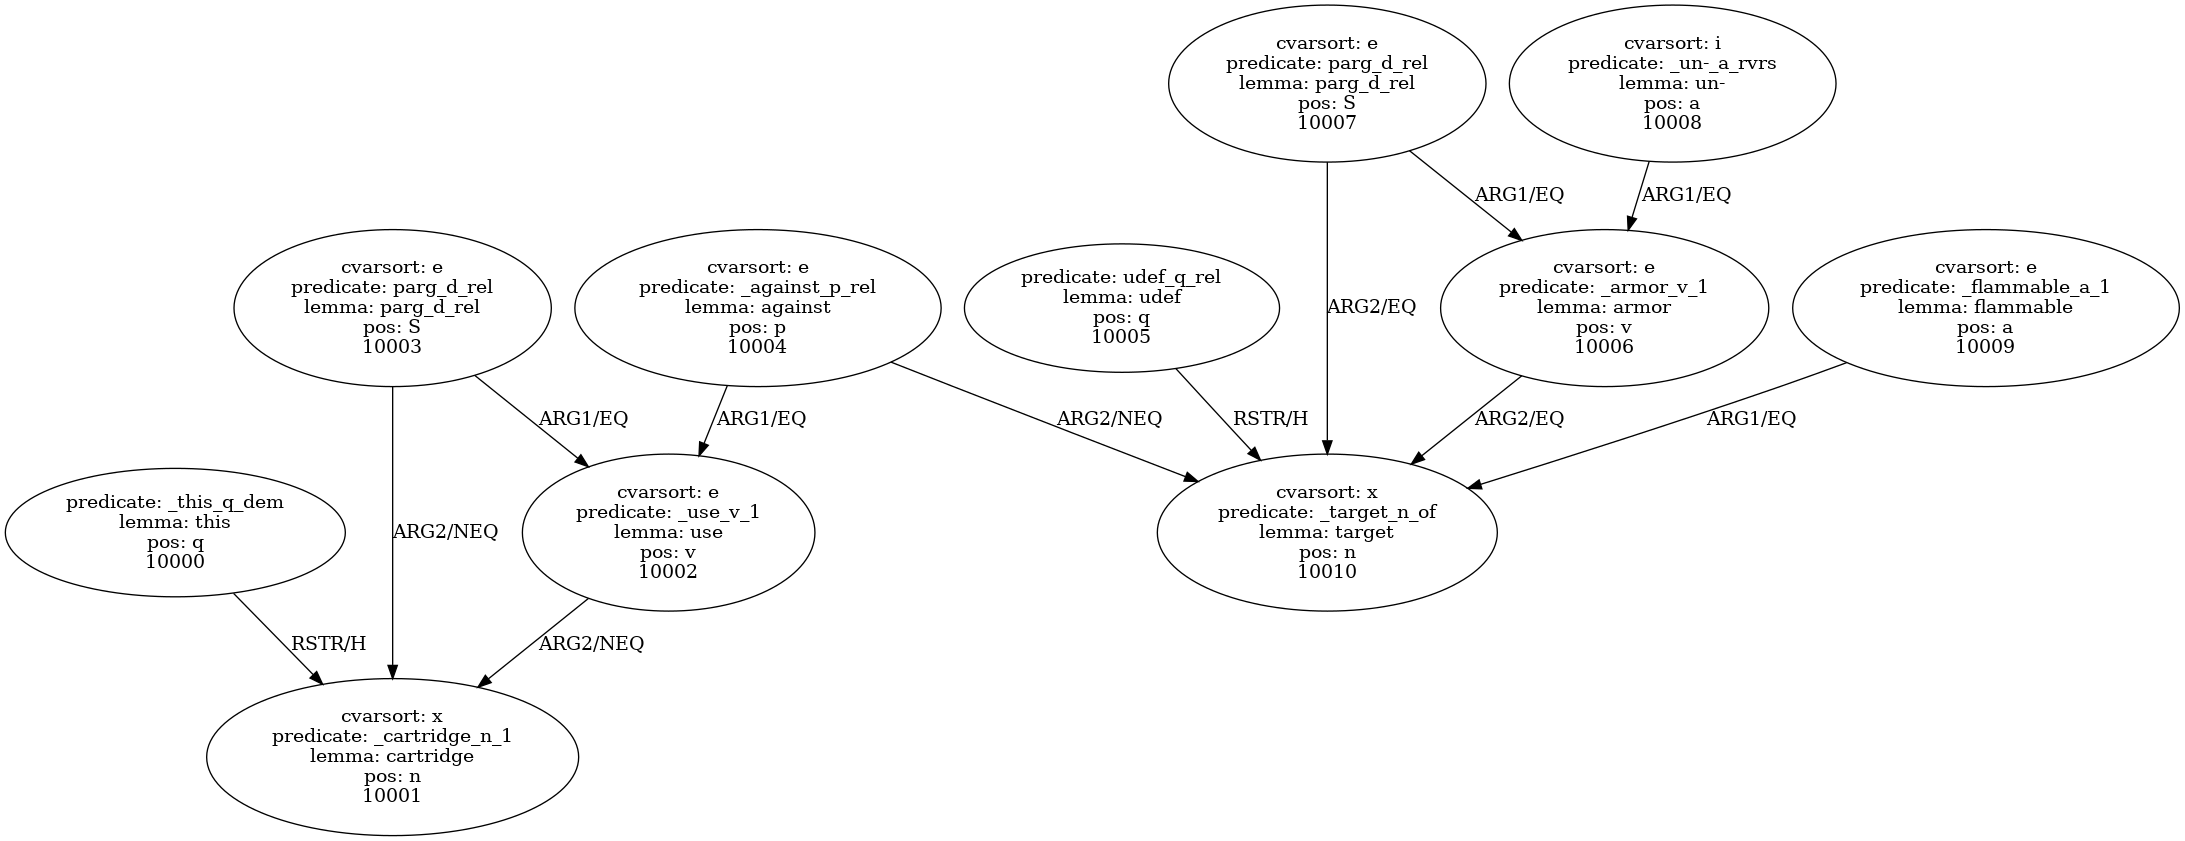

In [ ]:
save_path = "./figures/dmrs_1000107900780.png"
Image(save_path)

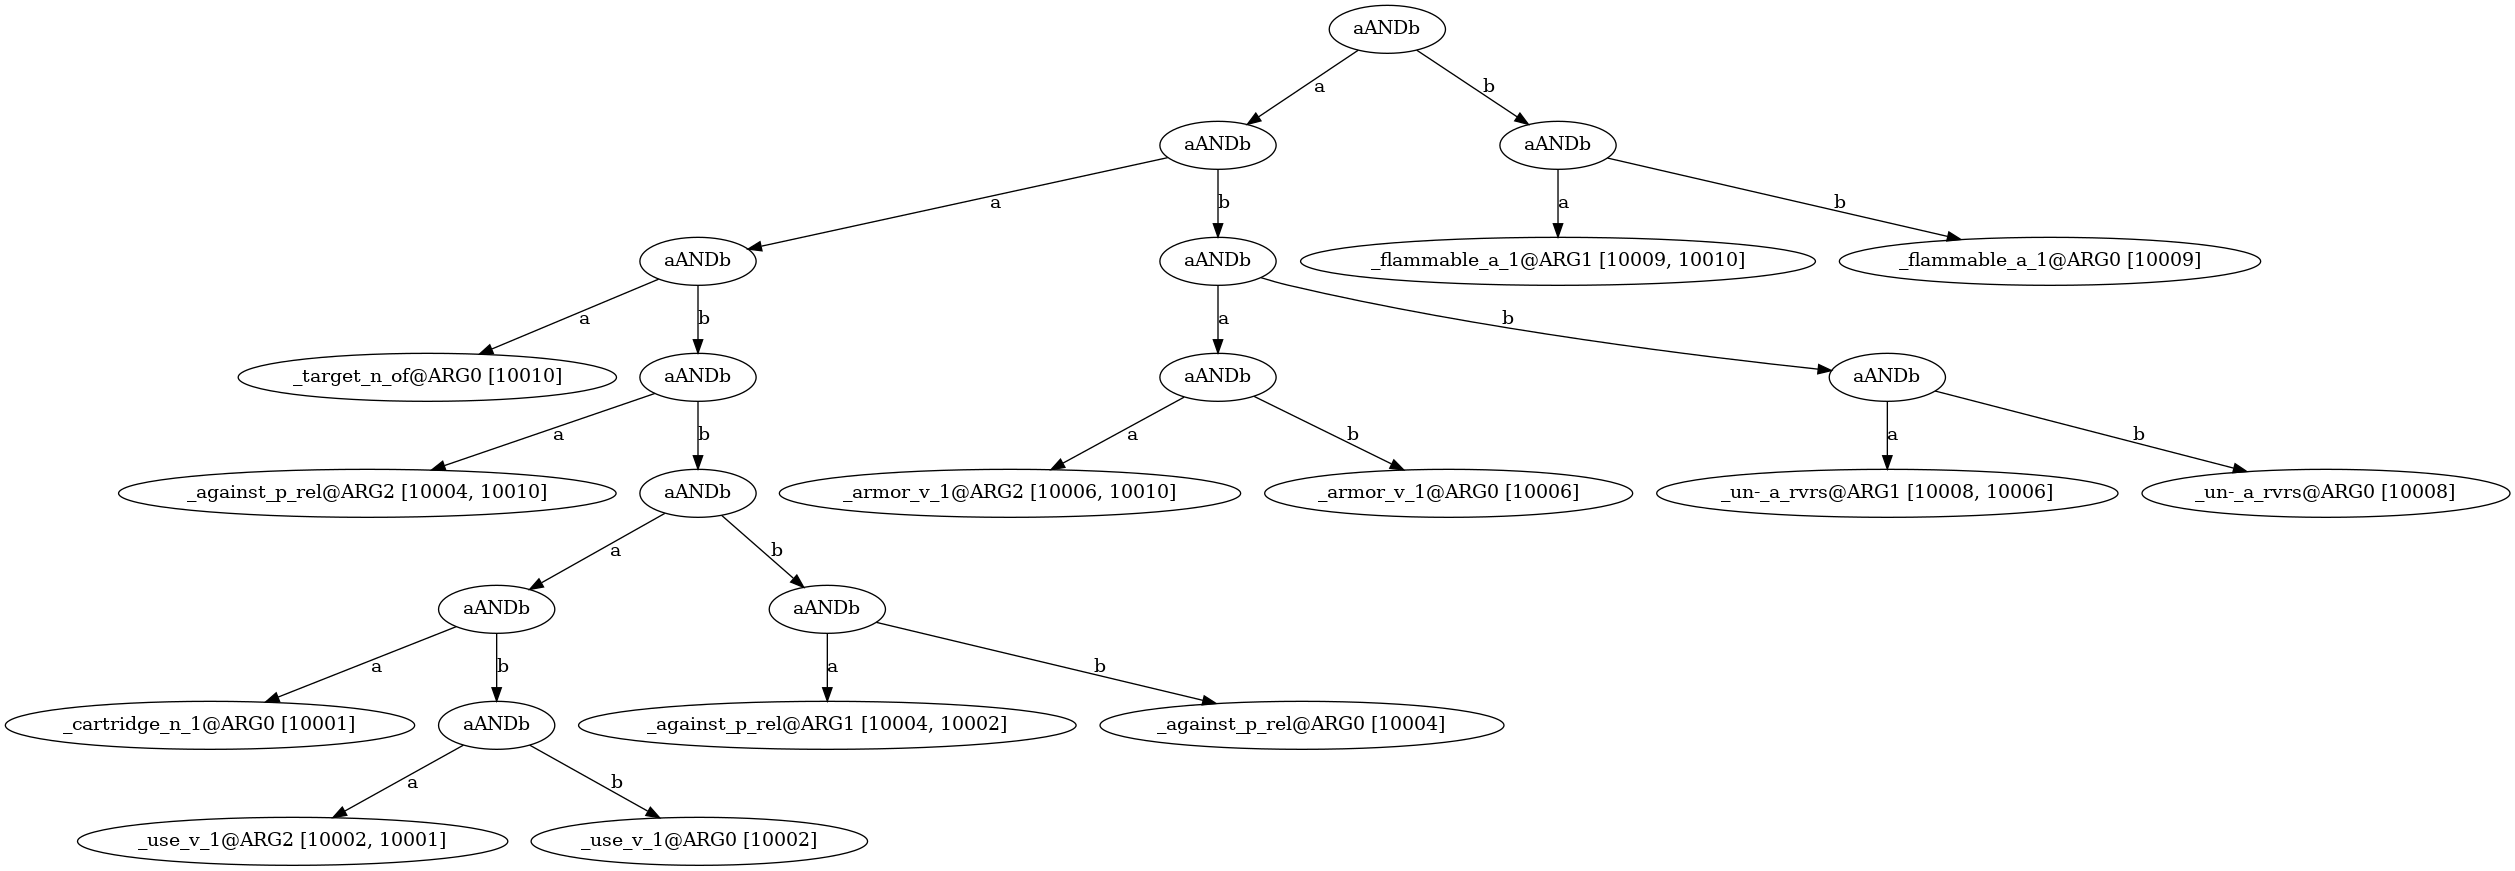

In [ ]:
save_path = "./figures/logic_expr_1000107900780.png"
Image(save_path)

In [ ]:
from disjoint_set import DisjointSet
ds = DisjointSet()


In [ ]:
ds.find(1)


1

In [ ]:
ds.find(1)


1

In [ ]:
ds.find(2)


2

In [ ]:
ds.connected(1,2)
ds.union(1,2)
ds.union(1,4)
ds.find(2)

4

In [ ]:
True
>>> ds.connected(1,3)
False

>>> "a" in ds
False
>>> ds.find("a")
'a'
>>> "a" in ds
True

>>> list(ds)
[(1, 2), (2, 2), (3, 3), ('a', 'a')]

>>> list(ds.itersets())
[{1, 2}, {3}, {'a'}]